# Installation of Pandas and Ucimlrepo

In [1]:
#!pip install pandas
#!pip install ucimlrepo
#%pip install matplotlib


In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import numpy as np
import math
import matplotlib.pyplot as plt
import string
from pprint import pprint
import random
from collections import Counter

# Breast Cancer KNN

Nearest Neighbors, Actual Label, Predicted Label, and Distance:
Test Point 0: [1.218e+01 1.408e+01 7.725e+01 4.614e+02 7.734e-02 3.212e-02 1.123e-02
 5.051e-03 1.673e-01 5.649e-02 2.113e-01 5.996e-01 1.438e+00 1.582e+01
 5.343e-03 5.767e-03 1.123e-02 5.051e-03 1.977e-02 9.502e-04 1.285e+01
 1.647e+01 8.160e+01 5.131e+02 1.001e-01 5.332e-02 4.116e-02 1.852e-02
 2.293e-01 6.037e-02]
Nearest Neighbors: [[1.240e+01 1.768e+01 8.147e+01 4.678e+02 1.054e-01 1.316e-01 7.741e-02
  2.799e-02 1.811e-01 7.102e-02 1.767e-01 1.460e+00 2.204e+00 1.543e+01
  1.000e-02 3.295e-02 4.861e-02 1.167e-02 2.187e-02 6.005e-03 1.288e+01
  2.291e+01 8.961e+01 5.158e+02 1.450e-01 2.629e-01 2.403e-01 7.370e-02
  2.556e-01 9.359e-02]]
Actual Label: B
Predicted Label: B
Distance: [13.64882415]

Test Point 1: [2.026e+01 2.303e+01 1.324e+02 1.264e+03 9.078e-02 1.313e-01 1.465e-01
 8.683e-02 2.095e-01 5.649e-02 7.576e-01 1.509e+00 4.554e+00 8.787e+01
 6.016e-03 3.482e-02 4.232e-02 1.269e-02 2.657e-02 4.411e-03 2.422e+0

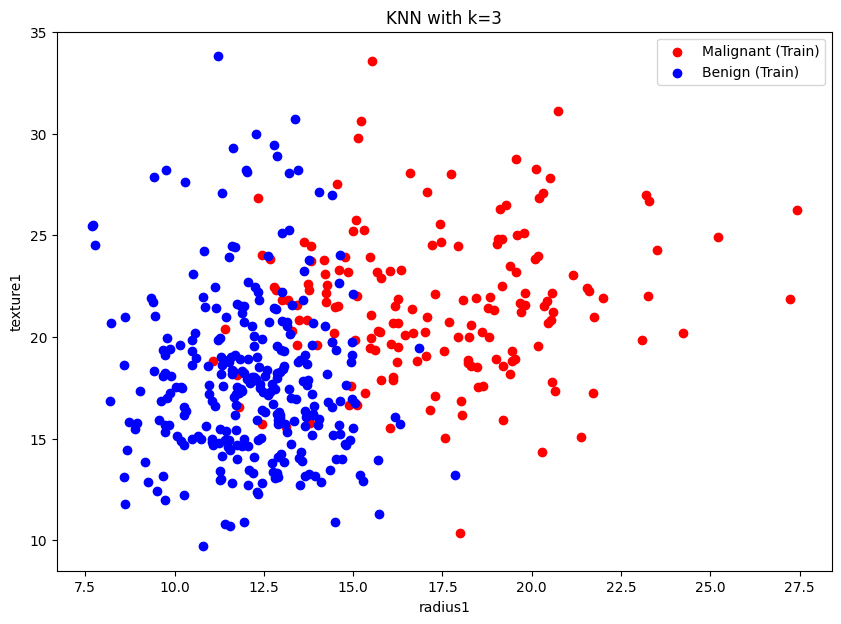

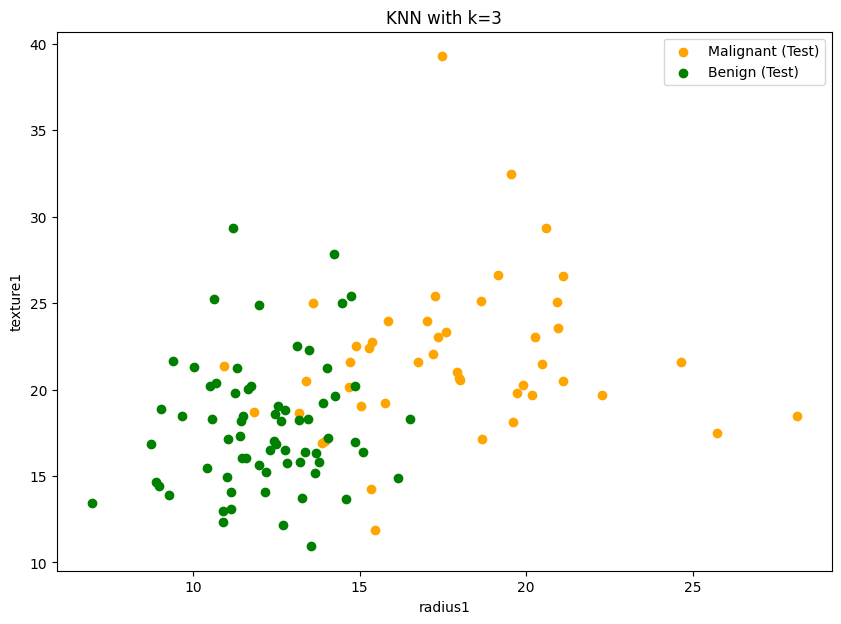

In [5]:
# Fetch dataset my version
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets
z = breast_cancer_wisconsin_diagnostic.targets

# Place the target variable as the last column of your dataset
data = pd.DataFrame(data=X, columns=z)
data['Diagnosis'] = y

# Split the dataset function
def split_data(data, test_size):
    data = data.sample(frac=1)  # Shuffle the data
    train_data = data.iloc[:int(len(data)*(1-test_size))]
    test_data = data.iloc[int(len(data)*(1-test_size)):]
    return train_data, test_data

# Split the data into 80% training and 20% testing
train_data, test_data = split_data(data, 0.2)

# Split features and labels for training and testing
X_train = train_data.drop(columns=['Diagnosis']).values
#print('Xtrain', X_train)
y_train = train_data['Diagnosis'].values
#print('Ytrain',y_train)
X_test = test_data.drop(columns=['Diagnosis']).values
#print('Xtest',X_test)
y_test = test_data['Diagnosis'].values
#print('Ytest', y_test)

alpha = 3

# Define the KNN classifier function
def knn_predict(X_train, y_train, X_test, k=alpha):
    predictions = [] # Store the predictions
    for test_point in X_test:
        # Calculate Euclidean distance from the test point to all training points
        distances = np.sqrt(np.sum((X_train - test_point)**2, axis=1))
        
        # Get indices of the k-nearest neighbors
        k_indices = distances.argsort()[:k] # Get the indices of the k-nearest neighbors using argsort(). argsort() returns the indices that would sort an array. 
        
        # Get the labels of the k-nearest neighbors
        k_nearest_labels = [y_train[i] for i in k_indices] # This is done by using the indices of the k-nearest neighbors to get the labels of the k-nearest neighbors from the training labels.
        
        # Get the most common label (majority vote)
        most_common = Counter(k_nearest_labels).most_common(1)[0][0] # Use the Counter class from the collections module to get the most common label from the k-nearest neighbors. [0][0] is used to get the most common label from the list of most common labels.
        predictions.append(most_common) # Store the prediction for the test point in the list of predictions 
    
    return predictions

# Run KNN with k=3 (or choose a suitable k value)
k = alpha
y_pred = knn_predict(X_train, y_train, X_test, k)


# show the nearets neighbors, their actual label, the predicted lable, and their distance. Do it for 5 points
print("Nearest Neighbors, Actual Label, Predicted Label, and Distance:")
for i in range(5): # Loop through the first 5 test point
    print(f"Test Point {i}: {X_test[i]}")
    distances = np.sqrt(np.sum((X_train - X_test[i])**2, axis=1))
    k_indices = distances.argsort()[:1]
    print(f"Nearest Neighbors: {X_train[k_indices]}")
    print(f"Actual Label: {y_test[i]}")
    print(f"Predicted Label: {y_pred[i]}")
    print(f"Distance: {distances[k_indices]}")
    print()


# Evaluate accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test) 
print(f'KNN classifier accuracy: {accuracy * 100:.2f}%')

# Display predicted vs. actual labels for test data
print("Predicted vs Actual:")
for i in range(len(y_test)):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")



feature_indices = [0, 1]  # Use the actual column indices you chose for your features
X_train = train_data.iloc[:, feature_indices].values # update the X_train with the features_indices selected
X_test = test_data.iloc[:, feature_indices].values # update the X_test with the features_indices selected

# Get the names of the selected features
feature_1_name = data.columns[feature_indices[0]]
feature_2_name = data.columns[feature_indices[1]]

print("Chosen Features for Plotting:")
print(f"Feature 1: {feature_1_name}")
print(f"Feature 2: {feature_2_name}")

# Plot training data with selected feature names as labels
plt.figure(figsize=(10, 7))
plt.title(f"KNN with k={k}")

# Set the labels for the x and y axes
plt.xlabel(feature_1_name)
plt.ylabel(feature_2_name)

# Plot the training points
plt.scatter(X_train[y_train == 'M', 0], X_train[y_train == 'M', 1], color='red', label='Malignant (Train)') # select the first row of X_train where y_train is 'M' and plot it against the second row of X_train where y_train is 'M'
plt.scatter(X_train[y_train == 'B', 0], X_train[y_train == 'B', 1], color='blue', label='Benign (Train)') # select the first row of X_train where y_train is 'B' and plot it against the second row of X_train where y_train is 'B'
plt.legend()
plt.show()

# Plot test data with selected feature names as labels
plt.figure(figsize=(10, 7))
plt.title(f"KNN with k={k}")
plt.xlabel(feature_1_name)
plt.ylabel(feature_2_name)

# Plot the test points
plt.scatter(X_test[y_test == 'M', 0], X_test[y_test == 'M', 1], color='orange', label='Malignant (Test)')
plt.scatter(X_test[y_test == 'B', 0], X_test[y_test == 'B', 1], color='green', label='Benign (Test)')
plt.legend()
plt.show()
plt.show()

# Breast Cancer Bayesian Clasifier

Mean:
[[1.21393610e+01 1.79067870e+01 7.80315162e+01 4.62508664e+02
  9.29125993e-02 8.06237184e-02 4.61184177e-02 2.61247112e-02
  1.74671480e-01 6.30816245e-02 2.80075812e-01 1.20680072e+00
  1.96928773e+00 2.07384657e+01 7.19273285e-03 2.14910758e-02
  2.61022007e-02 9.93189170e-03 2.04305740e-02 3.67499458e-03
  1.33627509e+01 2.35223105e+01 8.69169314e+01 5.57736101e+02
  1.25821480e-01 1.85121877e-01 1.67476830e-01 7.57059603e-02
  2.70915162e-01 8.00856679e-02]
 [1.75327528e+01 2.16175843e+01 1.15687753e+02 9.86225281e+02
  1.02288034e-01 1.41170674e-01 1.56391236e-01 8.72155618e-02
  1.91567416e-01 6.22141011e-02 6.07760112e-01 1.21164944e+00
  4.30624157e+00 7.26241573e+01 6.62588764e-03 3.08270506e-02
  3.99803933e-02 1.50585899e-02 2.02292640e-02 3.95106742e-03
  2.11562360e+01 2.92773034e+01 1.41166067e+02 1.42451966e+03
  1.43799944e-01 3.59451742e-01 4.32874607e-01 1.80811854e-01
  3.18975281e-01 9.00373034e-02]]
Variance:
[[3.32152027e+00 1.63898059e+01 1.45998766e+02 1.

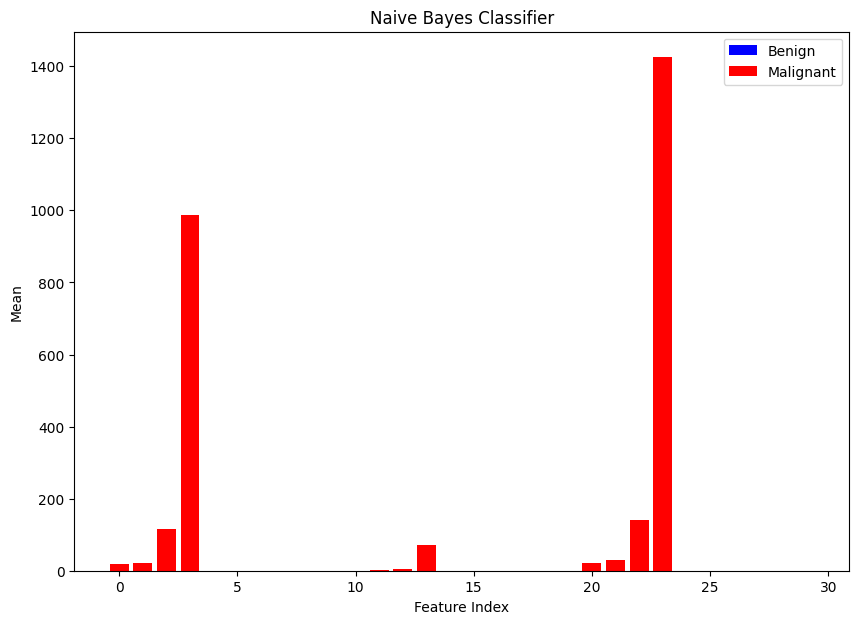

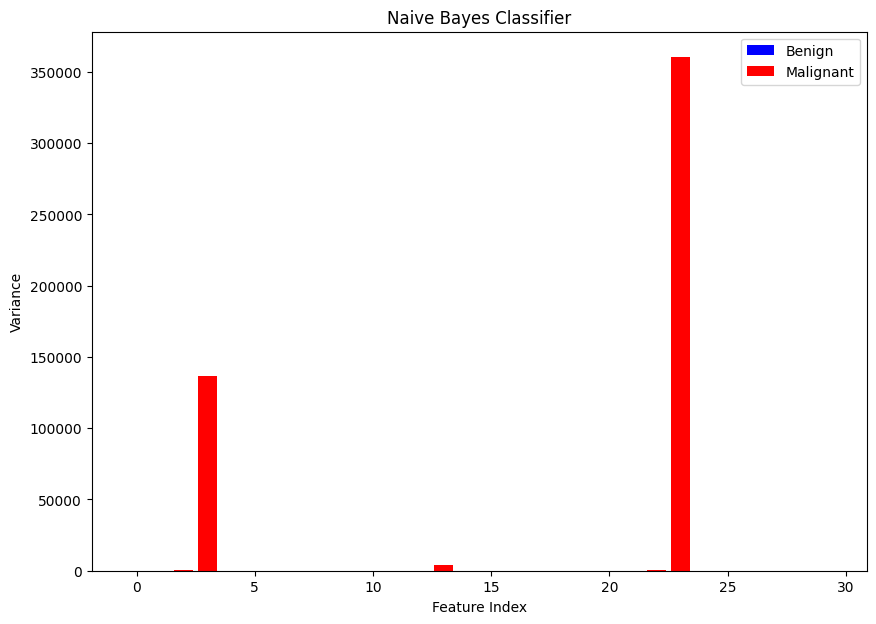

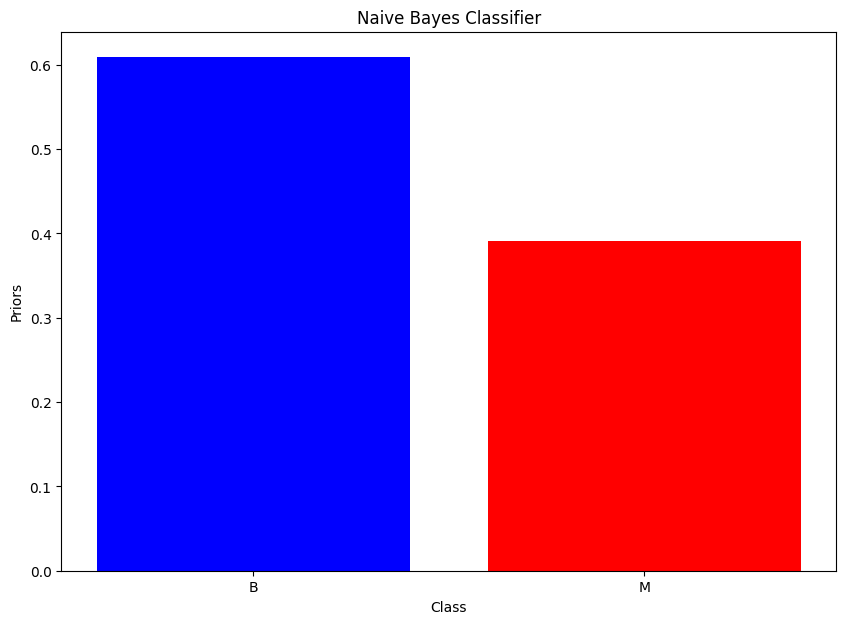

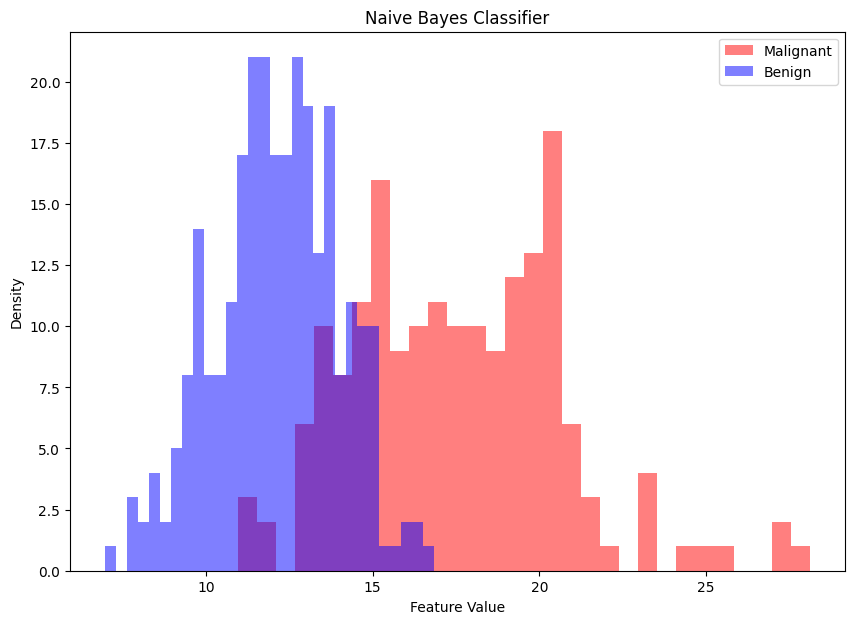

In [ ]:
#Naive Bayes Classifiers

# Fetch dataset my version
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets
z = breast_cancer_wisconsin_diagnostic.targets

# Place the target variable as the last column of your dataset
data = pd.DataFrame(data=X, columns=z)
data['Diagnosis'] = y

# Split the dataset function
def split_data(data, test_size):
    data = data.sample(frac=1)  # Shuffle the data
    train_data = data.iloc[:int(len(data)*(1-test_size))]
    test_data = data.iloc[int(len(data)*(1-test_size)):]
    return train_data, test_data

# Split the data into 80% training and 20% testing
train_data, test_data = split_data(data, 0.2)

# Split features and labels for training and testing
X_train = train_data.drop(columns=['Diagnosis']).values
#print('Xtrain', X_train)
y_train = train_data['Diagnosis'].values
#print('Ytrain',y_train)
X_test = test_data.drop(columns=['Diagnosis']).values
#print('Xtest',X_test)
y_test = test_data['Diagnosis'].values
#print('Ytest', y_test)

class NaiveBayes:
    def fit(self, X, y): # this function will train the Naive Bayes classifier
        n_samples, n_features = X.shape #this will give the number of samples and the number of features by getting the shape of the input data
        self._classes = np.unique(y) #this will get the unique classes in the target variable by using the unique function from numpy
        n_classes = len(self._classes) #this will get the number of unique classes by getting the length of the unique classes

        # Initialize mean, var, and priors
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64) # this will initialize the mean for each class and feature to zero
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)  # this will initialize the variance for each class and feature
        self._priors = np.zeros(n_classes, dtype=np.float64) # this will initialize the prior probability for each class to zero

        for idx, c in enumerate(self._classes): # this will loop through the unique classes and get the index and the class
            X_c = X[y==c] # Get the samples for the current class
            self._mean[idx, :] = X_c.mean(axis=0) # Calculate the mean for each feature
            self._var[idx, :] = X_c.var(axis=0) # Calculate the variance for each feature
            self._priors[idx] = X_c.shape[0] / float(n_samples) # Calculate the prior probability for the class
            
    def predict(self, X): # this function will predict the class for the input data
        y_pred = [self._predict(x) for x in X] # this will loop through the input data and get the prediction for each sample
        return np.array(y_pred) # this will return the predictions as a numpy array
    
    def _predict(self, x): # this function will predict the class for a single sample
        posteriors = [] # this will store the posterior probability for each class

        #calculate posterior probability for each class
        for idx, c in enumerate(self._classes): # this will loop through the unique classes and get the index and the class
            prior = np.log(self._priors[idx]) # this will get the prior probability for the class and take the log of it
            posterior = np.sum(np.log(self._pdf(idx, x))) # this will get the log of the probability density function for the class and the sample
            posterior = prior + posterior # this will add the prior and the posterior to get the posterior probability
            posteriors.append(posterior) # this will store the posterior probability in the list of posteriors

        #return class with highest posterior probability
        # argmax returns the index of the max value
        return self._classes[np.argmax(posteriors)] # this will return the class with the highest posterior probability

    def _pdf(self, class_idx, x): # this function will calculate the probability density function for a single sample
        mean = self._mean[class_idx] # this will get the mean for the class
        var = self._var[class_idx] # this will get the variance for the class
        numerator = np.exp(- (x - mean) ** 2 / (2 * var)) # this will calculate the numerator of the probability density function
        denominator = np.sqrt(2 * np.pi * var) # this will calculate the denominator of the probability density function
        return numerator / denominator # this will return the probability density function
    

# Train the Naive Bayes classifier
nb = NaiveBayes() # this will create an instance of the NaiveBayes class
nb.fit(X_train, y_train) # this will train the Naive Bayes classifier on the training data

# Predict on the test set
y_pred = nb.predict(X_test) # this will predict the class for the test data

#mean, variance, priors and class
print("Mean:")
print(nb._mean)
print("Variance:")
print(nb._var)
print("Priors:")
print(nb._priors)
print("Classes:")
print(nb._classes)

# Evaluate accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("\n", f'Naive Bayes classifier accuracy: {accuracy * 100:.2f}%')



# Display predicted vs. actual labels for test data
print("\n", "Predicted vs Actual:")
for i in range(len(y_test)):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")



# plot the mean, varience and priors graphs
plt.figure(figsize=(10, 7))
plt.title("Naive Bayes Classifier")
plt.xlabel("Feature Index")
plt.ylabel("Mean")
plt.bar(range(len(nb._mean[0])), nb._mean[0], color='blue', label='Benign') #range(len(nb._mean[0])) is used to get the indices of the features. nb._mean[0] is the mean of the features for the benign class.   
plt.bar(range(len(nb._mean[1])), nb._mean[1], color='red', label='Malignant')
plt.legend()
plt.show()

plt.figure(figsize=(10, 7))
plt.title("Naive Bayes Classifier")
plt.xlabel("Feature Index")
plt.ylabel("Variance")
plt.bar(range(len(nb._var[0])), nb._var[0], color='blue', label='Benign')
plt.bar(range(len(nb._var[1])), nb._var[1], color='red', label='Malignant')
plt.legend()
plt.show()

plt.figure(figsize=(10, 7))
plt.title("Naive Bayes Classifier")
plt.xlabel("Class")
plt.ylabel("Priors")
plt.bar(nb._classes, nb._priors, color=['blue', 'red'])
plt.show()

#plot using histoplot
plt.figure(figsize=(10, 7))
plt.title("Naive Bayes Classifier")
plt.xlabel("Feature Value")
plt.ylabel("Density")
plt.hist(X_train[y_train == 'M'][:, 0], bins=30, color='red', alpha=0.5, label='Malignant')
plt.hist(X_train[y_train == 'B'][:, 0], bins=30, color='blue', alpha=0.5, label='Benign')
plt.legend()
plt.show()

# The density is higher for the benign class than the malignant class. 
# This is because the benign class has a higher mean and lower variance than the malignant class. 
# This means that the benign class has a higher density of points around the mean than the malignant class.
# The benign class has a higher prior probability than the malignant class.


# Mushroom KNN

Nearest Neighbors, Actual Label, Predicted Label, and Distance:
Test Point 0: [24.  6.  7. 20. 14.  6.  3.  2. 16. 20.  2. 19. 19.  7.  7. 16. 23. 15.
 16. 14. 25.  4.]
Nearest Neighbors: [[24.  6.  7. 20. 14.  6.  3.  2. 14. 20.  2. 19. 19.  7.  7. 16. 23. 15.
  16. 14. 25.  4.]]
Actual Label: e
Predicted Label: e
Distance: [2.]

Test Point 1: [ 6. 25. 16. 20. 14.  6.  3.  2. 23.  5.  2. 19. 19. 23. 23. 16. 23. 20.
 16. 23. 25. 16.]
Nearest Neighbors: [[ 6. 25. 14. 20. 14.  6.  3.  2. 23.  5.  2. 19. 19. 23. 23. 16. 23. 20.
  16. 23. 25. 16.]]
Actual Label: e
Predicted Label: e
Distance: [2.]

Test Point 2: [24. 25. 14. 20. 14.  6.  3.  2. 21. 20.  2. 19. 19. 23. 23. 16. 23. 15.
 16. 11. 25.  4.]
Nearest Neighbors: [[24. 25. 14. 20. 14.  6.  3.  2. 23. 20.  2. 19. 19. 23. 23. 16. 23. 15.
  16. 11. 25.  4.]]
Actual Label: e
Predicted Label: e
Distance: [2.]

Test Point 3: [24. 19.  5.  6. 19.  6.  3. 14.  2. 20. nan 11. 19. 23. 23. 16. 23. 15.
  5. 23. 22. 16.]
Nearest Neighbors: [[24.

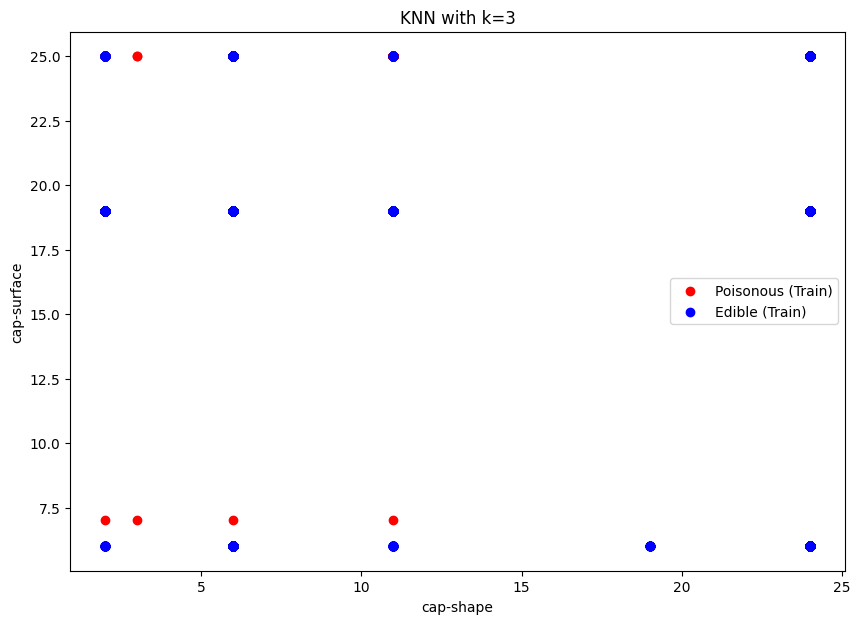

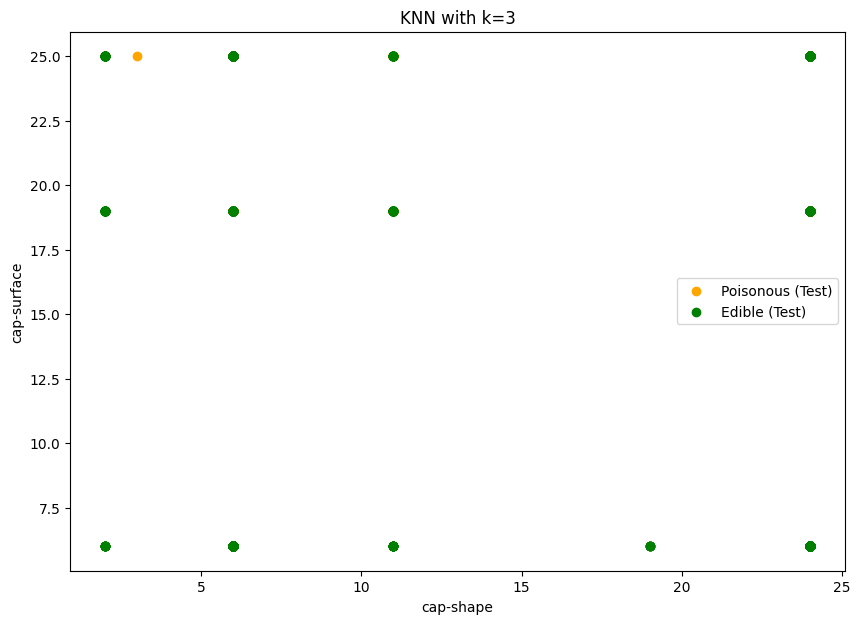

In [5]:
# Fetch mushroom dataset
mushroom = fetch_ucirepo(id=73)

# Extract features and target variable
X = mushroom.data.features  # Attributes
y = mushroom.data.targets   # Target variable
z = mushroom.targets        # Feature names

# Create a DataFrame and add the target column ('poisonous') as the last column
data = pd.DataFrame(data=X, columns=z)
data['poisonous'] = y

# Function to convert categorical letters to numbers (a=1, b=2, ..., z=26)
def letter_to_number(value):
    if isinstance(value, str) and value.isalpha() and len(value) == 1:  # Check if it's a single letter
        return ord(value.lower()) - ord('a') + 1
    return value  # Leave the value as-is if it's not a single letter

# Apply the letter_to_number conversion to all feature columns except the target
for column in data.columns[:-1]:  # Skip the last column (target)
    data[column] = data[column].apply(letter_to_number)

# Function to split the dataset into training and testing sets
def split_data(data, test_size):
    data = data.sample(frac=1)  # Shuffle the data
    train_data = data.iloc[:int(len(data)*(1-test_size))]  # 80% training data
    test_data = data.iloc[int(len(data)*(1-test_size)):]   # 20% testing data
    return train_data, test_data

# Split the data into 80% training and 20% testing
train_data, test_data = split_data(data, 0.2)


# Split the features and labels for training and testing
X_train = train_data.drop(columns=['poisonous']).values
#print('Xtrain', X_train)
y_train = train_data['poisonous'].values
#print('Ytrain',y_train)
X_test = test_data.drop(columns=['poisonous']).values
#print('Xtest',X_test)
y_test = test_data['poisonous'].values
#print('Ytest', y_test)

alpha = 3

# Define the KNN classifier function
def knn_predict(X_train, y_train, X_test, k=alpha):
    predictions = [] # Store the predictions
    for test_point in X_test:
        # Calculate Euclidean distance from the test point to all training points
        distances = np.sqrt(np.sum((X_train - test_point)**2, axis=1))
        
        # Get indices of the k-nearest neighbors
        k_indices = distances.argsort()[:k] # Get the indices of the k-nearest neighbors using argsort(). argsort() returns the indices that would sort an array. 
        
        # Get the labels of the k-nearest neighbors
        k_nearest_labels = [y_train[i] for i in k_indices] # This is done by using the indices of the k-nearest neighbors to get the labels of the k-nearest neighbors from the training labels.
        
        # Get the most common label (majority vote)
        most_common = Counter(k_nearest_labels).most_common(1)[0][0] # Use the Counter class from the collections module to get the most common label from the k-nearest neighbors. [0][0] is used to get the most common label from the list of most common labels.
        predictions.append(most_common) # Store the prediction for the test point in the list of predictions 
    
    return predictions

# Run KNN with k=3 (or choose a suitable k value)
k = alpha
y_pred = knn_predict(X_train, y_train, X_test, k)

# show the nearets neighbors, their actual label, the predicted lable, and their distance. Do it for 5 points
print("Nearest Neighbors, Actual Label, Predicted Label, and Distance:")
for i in range(5): # Loop through the first 5 test point
    print(f"Test Point {i}: {X_test[i]}")
    distances = np.sqrt(np.sum((X_train - X_test[i])**2, axis=1))
    k_indices = distances.argsort()[:1]
    print(f"Nearest Neighbors: {X_train[k_indices]}")
    print(f"Actual Label: {y_test[i]}")
    print(f"Predicted Label: {y_pred[i]}")
    print(f"Distance: {distances[k_indices]}")
    print()

# Evaluate accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test) 
print(f'KNN classifier accuracy: {accuracy * 100:.2f}%')

# Display predicted vs. actual labels for test data
print("Predicted vs Actual:")
for i in range(len(y_test)):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")



feature_indices = [0, 1]  # Use the actual column indices you chose for your features
X_train = train_data.iloc[:, feature_indices].values # update the X_train with the features_indices selected
X_test = test_data.iloc[:, feature_indices].values # update the X_test with the features_indices selected

# Get the names of the selected features
feature_1_name = data.columns[feature_indices[0]]
feature_2_name = data.columns[feature_indices[1]]

print("Chosen Features for Plotting:")
print(f"Feature 1: {feature_1_name}")
print(f"Feature 2: {feature_2_name}")


# plot the train data
plt.figure(figsize=(10, 7))
plt.title(f"KNN with k={k}")

# Set the labels for the x and y axes
plt.xlabel(feature_1_name)
plt.ylabel(feature_2_name)

plt.scatter(X_train[y_train == 'p', 0], X_train[y_train == 'p', 1], color='red', label='Poisonous (Train)') # select the first row of X_train where y_train is 'M' and plot it against the second row of X_train where y_train is 'M'
plt.scatter(X_train[y_train == 'e', 0], X_train[y_train == 'e', 1], color='blue', label='Edible (Train)') # select the first row of X_train where y_train is 'B' and plot it against the second row of X_train where y_train is 'B'
plt.legend()
plt.show()

# plot the test data
plt.figure(figsize=(10, 7))
plt.title(f"KNN with k={k}")

# Set the labels for the x and y axes
plt.xlabel(feature_1_name)
plt.ylabel(feature_2_name)

plt.scatter(X_test[y_test == 'p', 0], X_test[y_test == 'p', 1], color='orange', label='Poisonous (Test)') # select the first row of X_test where y_test is 'M' and plot it against the second row of X_test where y_test is 'M'
plt.scatter(X_test[y_test == 'e', 0], X_test[y_test == 'e', 1], color='green', label='Edible (Test)') # select the first row of X_test where y_test is 'B' and plot it against the second row of X_test where y_test is 'B'
plt.legend()
plt.show()


# Mushroom Bayesian Classifier 

Mean:
[[14.38112094 16.4159292  13.41710914 15.19705015 12.5300885   5.78761062
   8.7640118   2.84955752 16.18967552 14.24778761         nan 17.48643068
  17.66696165 19.06548673 18.9899705  16.         22.6380531  15.63126844
  13.28112094 14.07610619 18.1840708   7.66725664]
 [14.57285301 19.09456417 12.81087166  8.2740431  11.46510132  5.98230942
   3.56609842  8.8124799   8.00804117 12.73399807         nan 13.98037954
  14.22483114 17.25184947 17.19009328 16.         23.00321647 15.08941782
   9.69540045 15.61627533 21.99485365 10.16693471]]
Variance:
[[8.48464872e+01 6.83119586e+01 5.20915067e+01 4.41729706e+01
  1.48260858e+01 1.01683765e+00 8.20564040e+01 9.47294228e+00
  2.84840822e+01 5.31952385e+01            nan 1.63849191e+01
  1.98569321e+01 3.68523487e+01 3.69403124e+01 0.00000000e+00
  2.96368471e+00 2.75784234e+00 2.24150713e+01 1.84331459e+01
  5.94994513e+01 2.61547686e+01]
 [7.22253936e+01 4.89810866e+01 5.93556747e+01 2.66653314e+01
  5.63356267e+01 8.81399223e-02 

C:\Users\yman7\AppData\Local\Temp\ipykernel_940\524231039.py:82: RuntimeWarning: invalid value encountered in divide
  numerator = np.exp(- (x - mean) ** 2 / (2 * var)) # Calculate the numerator of the likelihood
C:\Users\yman7\AppData\Local\Temp\ipykernel_940\524231039.py:71: RuntimeWarning: divide by zero encountered in log
  posterior = np.sum(np.log(self._pdf(idx, x))) # Calculate the likelihood


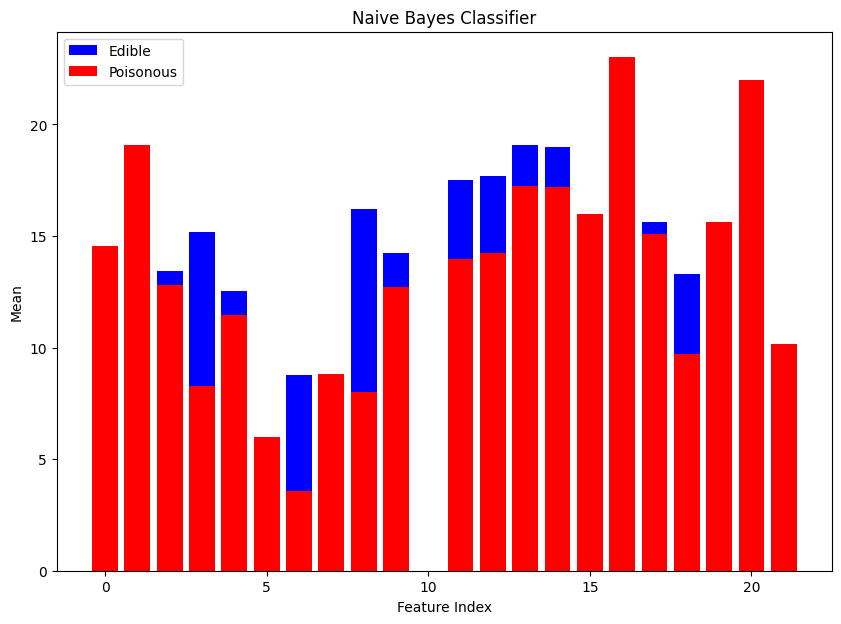

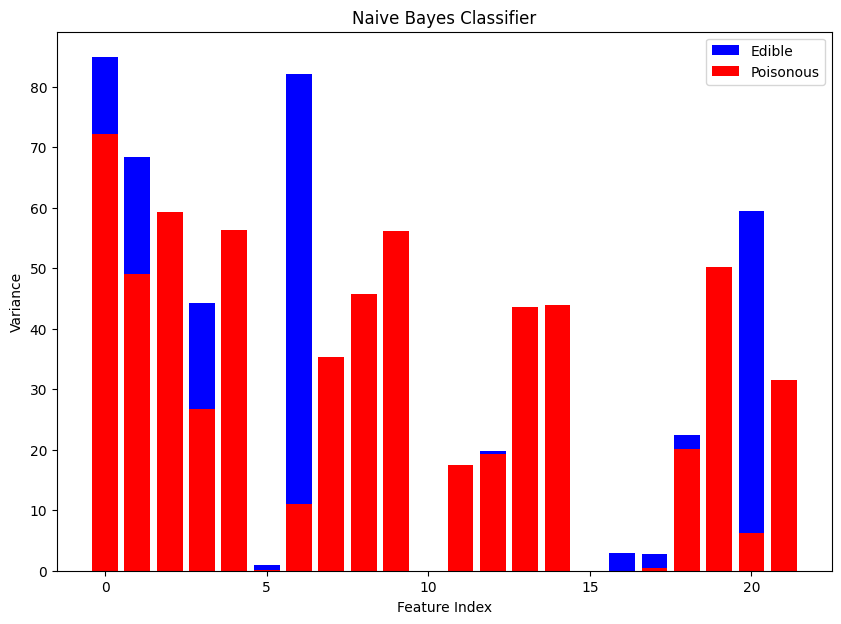

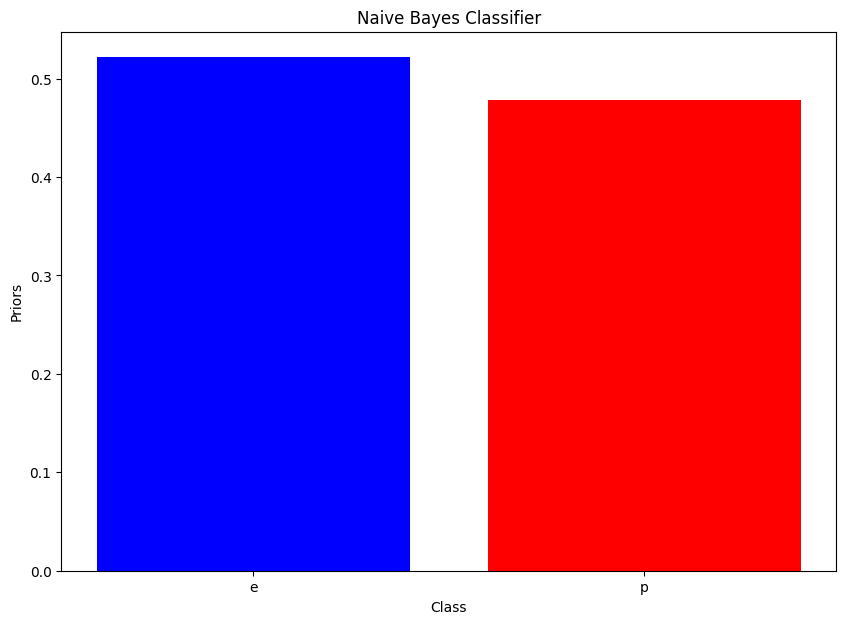

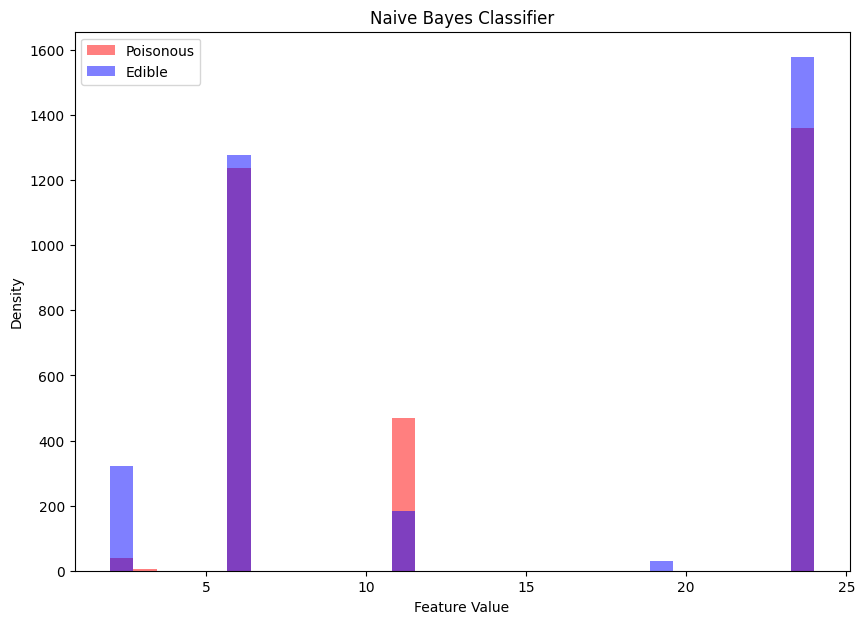

In [6]:
# Fetch mushroom dataset
mushroom = fetch_ucirepo(id=73)

# Extract features and target variable
X = mushroom.data.features  # Attributes
y = mushroom.data.targets   # Target variable
z = mushroom.targets        # Feature names

# Create a DataFrame and add the target column ('poisonous') as the last column
data = pd.DataFrame(data=X, columns=z)
data['poisonous'] = y

# Function to convert categorical letters to numbers (a=1, b=2, ..., z=26)
def letter_to_number(value):
    if isinstance(value, str) and value.isalpha() and len(value) == 1:  # Check if it's a single letter
        return ord(value.lower()) - ord('a') + 1
    return value  # Leave the value as-is if it's not a single letter

# Apply the letter_to_number conversion to all feature columns except the target
for column in data.columns[:-1]:  # Skip the last column (target)
    data[column] = data[column].apply(letter_to_number)

# Function to split the dataset into training and testing sets
def split_data(data, test_size):
    data = data.sample(frac=1)  # Shuffle the data
    train_data = data.iloc[:int(len(data)*(1-test_size))]  # 80% training data
    test_data = data.iloc[int(len(data)*(1-test_size)):]   # 20% testing data
    return train_data, test_data

# Split the data into 80% training and 20% testing
train_data, test_data = split_data(data, 0.2)


# Split the features and labels for training and testing
X_train = train_data.drop(columns=['poisonous']).values
#print('Xtrain', X_train)
y_train = train_data['poisonous'].values
#print('Ytrain',y_train)
X_test = test_data.drop(columns=['poisonous']).values
#print('Xtest',X_test)
y_test = test_data['poisonous'].values
#print('Ytest', y_test)

class NaiveBayes:
    def fit(self, X, y): # Fit the model to the training data
        n_samples, n_features = X.shape # Get the number of samples and features
        self._classes = np.unique(y) # Get the unique classes in the target variable
        n_classes = len(self._classes) # Get the number of classes

        # Initialize mean, var, and priors
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64) # Initialize the mean array with zeros
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)  # Initialize the variance array with zeros
        self._priors = np.zeros(n_classes, dtype=np.float64) # Initialize the priors array with zeros

        for idx, c in enumerate(self._classes): # Loop through the classes
            X_c = X[y==c] # Get the samples for the current class
            self._mean[idx, :] = X_c.mean(axis=0) # Calculate the mean for each feature
            self._var[idx, :] = X_c.var(axis=0) # Calculate the variance for each feature
            self._priors[idx] = X_c.shape[0] / float(n_samples) # Calculate the prior probability for the class
            
    def predict(self, X): # Predict the class of the test data
        y_pred = [self._predict(x) for x in X] # Loop through the test data and predict
        return np.array(y_pred) # Return the predictions as a numpy array
    
    def _predict(self, x): # Predict the class of a single data point
        posteriors = [] # Store the posterior probabilities

        #calculate posterior probability for each class
        for idx, c in enumerate(self._classes): # Loop through the classes
            prior = np.log(self._priors[idx]) # Calculate the prior probability
            posterior = np.sum(np.log(self._pdf(idx, x))) # Calculate the likelihood
            posterior = prior + posterior # Calculate the posterior probability
            posteriors.append(posterior) # Store the posterior probability

        #return class with highest posterior probability
        # argmax returns the index of the max value
        return self._classes[np.argmax(posteriors)] # Return the class with the highest posterior probability

    def _pdf(self, class_idx, x): # Calculate the likelihood
        mean = self._mean[class_idx] # Get the mean for the class
        var = self._var[class_idx] # Get the variance for the class
        numerator = np.exp(- (x - mean) ** 2 / (2 * var)) # Calculate the numerator of the likelihood
        denominator = np.sqrt(2 * np.pi * var) # Calculate the denominator of the likelihood
        return numerator / denominator # Return the likelihood
    

# Train the Naive Bayes classifier
nb = NaiveBayes() # Create an instance of the NaiveBayes class
nb.fit(X_train, y_train) # Fit the model to the training data

# Predict on the test set
y_pred = nb.predict(X_test) # Predict the class of the test data

#mean, variance, priors and class
print("Mean:")
print(nb._mean)
print("Variance:")
print(nb._var)
print("Priors:")
print(nb._priors)
print("Classes:")
print(nb._classes)

# Evaluate accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test) # Calculate the accuracy by comparing the predicted labels to the actual labels
print("\n", f'Naive Bayes classifier accuracy: {accuracy * 100:.2f}%') # Print the accuracy



# Display predicted vs. actual labels for test data
print("\n", "Predicted vs Actual:") 
for i in range(len(y_test)): # Loop through the test data for each data point
    print(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}") # Print the predicted and actual labels for each test data point



# plot the mean, varience and priors graphs
plt.figure(figsize=(10, 7))
plt.title("Naive Bayes Classifier")
plt.xlabel("Feature Index")
plt.ylabel("Mean")
plt.bar(range(len(nb._mean[0])), nb._mean[0], color='blue', label='Edible') #range(len(nb._mean[0])) is used to get the indices of the features. nb._mean[0] is the mean of the features for the benign class.
plt.bar(range(len(nb._mean[1])), nb._mean[1], color='red', label='Poisonous')
plt.legend()
plt.show()

plt.figure(figsize=(10, 7))
plt.title("Naive Bayes Classifier")
plt.xlabel("Feature Index")
plt.ylabel("Variance")
plt.bar(range(len(nb._var[0])), nb._var[0], color='blue', label='Edible')
plt.bar(range(len(nb._var[1])), nb._var[1], color='red', label='Poisonous')
plt.legend()
plt.show()

plt.figure(figsize=(10, 7))
plt.title("Naive Bayes Classifier")
plt.xlabel("Class")
plt.ylabel("Priors")
plt.bar(nb._classes, nb._priors, color=['blue', 'red'])
plt.show()



#plot using histoplot
plt.figure(figsize=(10, 7))
plt.title("Naive Bayes Classifier")
plt.xlabel("Feature Value")
plt.ylabel("Density")
plt.hist(X_train[y_train == 'p'][:, 0], bins=30, color='red', alpha=0.5, label='Poisonous')
plt.hist(X_train[y_train == 'e'][:, 0], bins=30, color='blue', alpha=0.5, label='Edible')
plt.legend()
plt.show()

# The density is higher for the edible mushrooms than the poisonous mushrooms. 
# This is because the edible mushrooms have a higher mean and lower variance compared to the poisonous mushrooms. 
# This means that the edible mushrooms are more likely to have similar feature values, resulting in a higher density. 
# On the other hand, the poisonous mushrooms have a lower mean and higher variance, which results in a lower density. 
# This is consistent with the Naive Bayes classifier, which predicts the class of a mushroom based on the likelihood 
# of its features given the class. Since the edible mushrooms have a higher likelihood of having similar feature 
# values, they are more likely to be classified as edible by the Naive Bayes classifier.





# Letter Recognition KNN

Nearest Neighbors, Actual Label, Predicted Label, and Distance:
Test Point 0: [ 4  5  5  8  2  7  5 14  5  7 14  8  3  9  0  8]
Nearest Neighbors: [[ 4  5  5  7  2  7  5 14  5  7 14  8  3  9  0  8]]
Actual Label: U
Predicted Label: U
Distance: [1.]

Test Point 1: [ 5  6  6  8  6  7 10  4  2  7  9 11  3  9  5  8]
Nearest Neighbors: [[ 4  6  5  8  5  7 10  4  3  6  9 11  3  8  6  8]]
Actual Label: Q
Predicted Label: Q
Distance: [2.64575131]

Test Point 2: [3 9 5 6 4 8 8 3 8 6 6 6 3 9 6 7]
Nearest Neighbors: [[4 8 5 6 4 8 7 3 8 5 6 7 3 9 7 7]]
Actual Label: X
Predicted Label: X
Distance: [2.44948974]

Test Point 3: [ 6 10  5  5  3  8  7  5  6 10  4  7  4  7  5  8]
Nearest Neighbors: [[ 6 10  6  5  3  8  6  5  6 12  4  7  5  7  5  9]]
Actual Label: G
Predicted Label: O
Distance: [2.82842712]

Test Point 4: [ 6  9  8  8  9  7  8  6  5  7  6  7  6 11  8 11]
Nearest Neighbors: [[ 5  9  8  8  9  7  7  5  4  7  6  8  7 10  9 11]]
Actual Label: V
Predicted Label: F
Distance: [2.82842712]

KNN cl

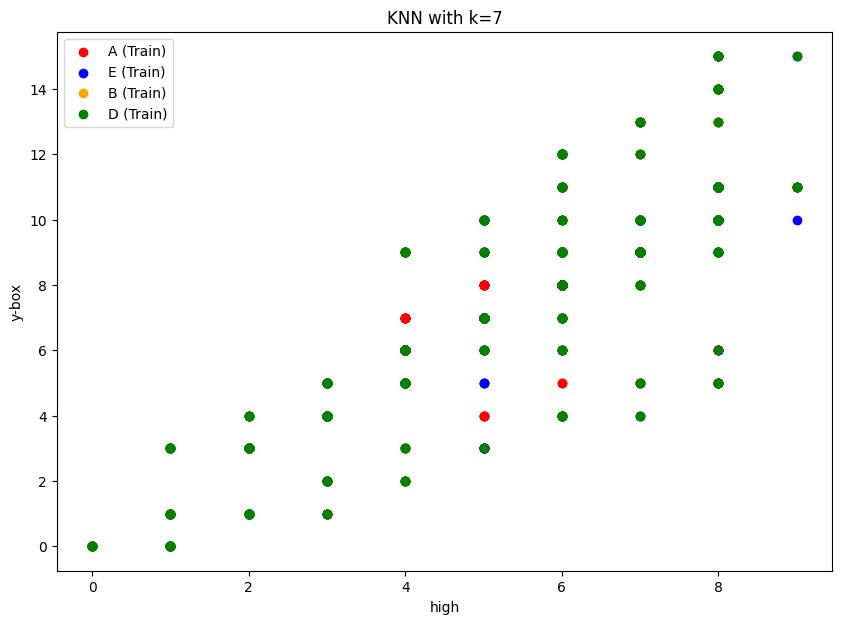

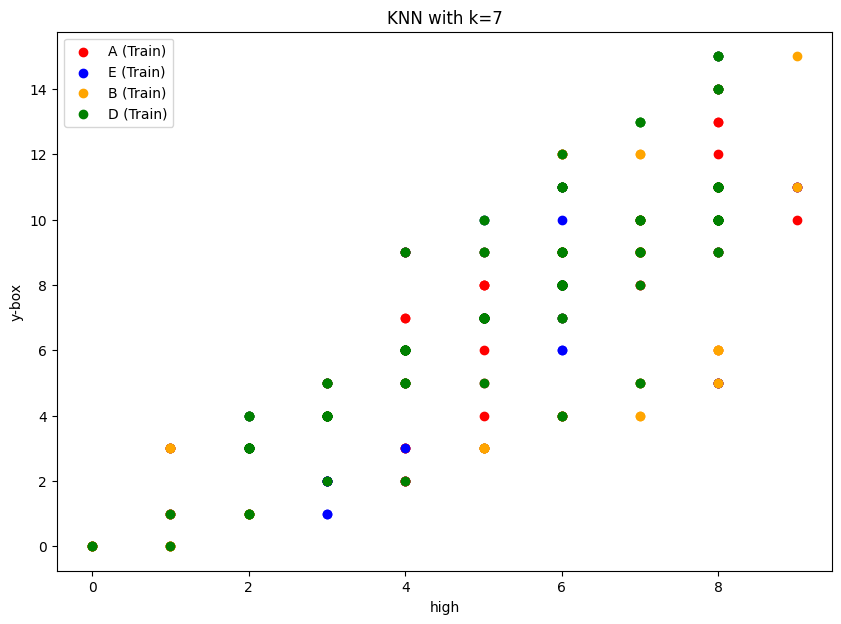

In [7]:
# Fetch the Letter Recognition dataset
letter_recognition = fetch_ucirepo(id=59)

# Data (as pandas DataFrames)
X = letter_recognition.data.features  # Features
y = letter_recognition.data.targets   # Target variable (lettr)
z = letter_recognition.data.feature_names  # Attribute names

# Combine features and target into a single DataFrame
data = pd.DataFrame(data=X, columns=z)
data['lettr'] = y  # Add the target variable to the DataFrame

# Function to split the data into training and testing sets
def split_data(data, test_size):
    data = data.sample(frac=1)  # Shuffle the data
    train_data = data.iloc[:int(len(data)*(1-test_size))]  # 80% training data
    test_data = data.iloc[int(len(data)*(1-test_size)):]   # 20% testing data
    return train_data, test_data

# Split the data into 80% training and 20% testing
train_data, test_data = split_data(data, 0.2)

# Split the features and labels for training and testing
X_train = train_data.drop(columns=['lettr']).values
y_train = train_data['lettr'].values
X_test = test_data.drop(columns=['lettr']).values
y_test = test_data['lettr'].values

alpha = 7

# Define the KNN classifier function
def knn_predict(X_train, y_train, X_test, k=alpha):
    predictions = [] # Store the predictions
    for test_point in X_test:
        # Calculate Euclidean distance from the test point to all training points
        distances = np.sqrt(np.sum((X_train - test_point)**2, axis=1))
        
        # Get indices of the k-nearest neighbors
        k_indices = distances.argsort()[:k] # Get the indices of the k-nearest neighbors using argsort(). argsort() returns the indices that would sort an array. 
        
        # Get the labels of the k-nearest neighbors
        k_nearest_labels = [y_train[i] for i in k_indices] # This is done by using the indices of the k-nearest neighbors to get the labels of the k-nearest neighbors from the training labels.
        
        # Get the most common label (majority vote)
        most_common = Counter(k_nearest_labels).most_common(1)[0][0] # Use the Counter class from the collections module to get the most common label from the k-nearest neighbors. [0][0] is used to get the most common label from the list of most common labels.
        predictions.append(most_common) # Store the prediction for the test point in the list of predictions 
    
    return predictions

# Run KNN with k=3 (or choose a suitable k value)
k = alpha
y_pred = knn_predict(X_train, y_train, X_test, k)

# show the nearets neighbors, their actual label, the predicted lable, and their distance. Do it for 5 points
print("Nearest Neighbors, Actual Label, Predicted Label, and Distance:")
for i in range(5): # Loop through the first 5 test point
    print(f"Test Point {i}: {X_test[i]}")
    distances = np.sqrt(np.sum((X_train - X_test[i])**2, axis=1))
    k_indices = distances.argsort()[:1]
    print(f"Nearest Neighbors: {X_train[k_indices]}")
    print(f"Actual Label: {y_test[i]}")
    print(f"Predicted Label: {y_pred[i]}")
    print(f"Distance: {distances[k_indices]}")
    print()

# Evaluate accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test) 
print(f'KNN classifier accuracy: {accuracy * 100:.2f}%')

# Display predicted vs. actual labels for test data
print("Predicted vs Actual:")
for i in range(len(y_test)):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")



feature_indices = [3, 1]  # Use the actual column indices you chose for your features
X_train = train_data.iloc[:, feature_indices].values # update the X_train with the features_indices selected
X_test = test_data.iloc[:, feature_indices].values # update the X_test with the features_indices selected

# Get the names of the selected features
feature_1_name = data.columns[feature_indices[0]]
feature_2_name = data.columns[feature_indices[1]]

print("Chosen Features for Plotting:")
print(f"Feature 1: {feature_1_name}")
print(f"Feature 2: {feature_2_name}")


# plot the train data
plt.figure(figsize=(10, 7))
plt.title(f"KNN with k={k}")

# Set the labels for the x and y axes
plt.xlabel(feature_1_name)
plt.ylabel(feature_2_name)

plt.scatter(X_train[y_train == 'A', 0], X_train[y_train == 'A', 1], color='red', label='A (Train)') # select the first row of X_train where y_train is 'M' and plot it against the second row of X_train where y_train is 'M'
plt.scatter(X_train[y_train == 'E', 0], X_train[y_train == 'E', 1], color='blue', label='E (Train)') # select the first row of X_train where y_train is 'B' and plot it against the second row of X_train where y_train is 'B'
plt.scatter(X_train[y_train == 'B', 0], X_train[y_train == 'B', 1], color='orange', label='B (Train)') # select the first row of X_train where y_train is 'M' and plot it against the second row of X_train where y_train is 'M'
plt.scatter(X_train[y_train == 'D', 0], X_train[y_train == 'D', 1], color='green', label='D (Train)') # select the first row of X_train where y_train is 'M' and plot it against the second row of X_train where y_train is 'M'

plt.legend()
plt.show()

# plot the test data
plt.figure(figsize=(10, 7))
plt.title(f"KNN with k={k}")

# Set the labels for the x and y axes
plt.xlabel(feature_1_name)
plt.ylabel(feature_2_name)

plt.scatter(X_test[y_test == 'A', 0], X_test[y_test == 'A', 1], color='red', label='A (Train)') # select the first row of X_train where y_train is 'M' and plot it against the second row of X_train where y_train is 'M'
plt.scatter(X_test[y_test == 'E', 0], X_test[y_test == 'E', 1], color='blue', label='E (Train)') # select the first row of X_train where y_train is 'B' and plot it against the second row of X_train where y_train is 'B'
plt.scatter(X_test[y_test == 'B', 0], X_test[y_test == 'B', 1], color='orange', label='B (Train)') # select the first row of X_train where y_train is 'M' and plot it against the second row of X_train where y_train is 'M'
plt.scatter(X_test[y_test == 'D', 0], X_test[y_test == 'D', 1], color='green', label='D (Train)') # select the first row of X_train where y_train is 'M' and plot it against the second row of X_train where y_train is 'M'


plt.legend()
plt.show()

# Letter Recognition Bayesian Classifier

Mean:
[[ 3.3155416   6.92621664  5.10832025  5.14756672  2.94505495  8.85086342
   3.60282575  2.73783359  2.0266876   7.81632653  2.2967033   8.47880691
   2.74882261  6.32810047  2.84929356  7.50235479]
 [ 3.98381877  6.96601942  5.07928803  5.17152104  4.59708738  7.6828479
   7.06472492  5.39482201  5.56796117  7.94983819  5.51132686  6.6618123
   3.13754045  7.93527508  6.62944984  9.08737864]
 [ 4.06174957  7.15437393  4.74099485  5.37735849  2.79588336  5.41852487
   7.60205832  5.90737564  7.20240137  8.75986278  7.46655232 11.95711835
   2.00857633  8.88164666  4.0703259   8.53859348]
 [ 4.040625    7.2734375   5.1625      5.2828125   4.003125    7.5453125
   6.7859375   5.9109375   6.4984375   8.175       5.0828125   5.7546875
   3.3765625   7.8125      3.990625    7.6390625 ]
 [ 3.69394435  6.93617021  4.70540098  5.17021277  3.63829787  5.93617021
   7.38952537  4.19312602  7.58101473  8.57774141  6.25204583 10.32405892
   2.12111293  8.28150573  5.98036007  8.49427169]
 [ 

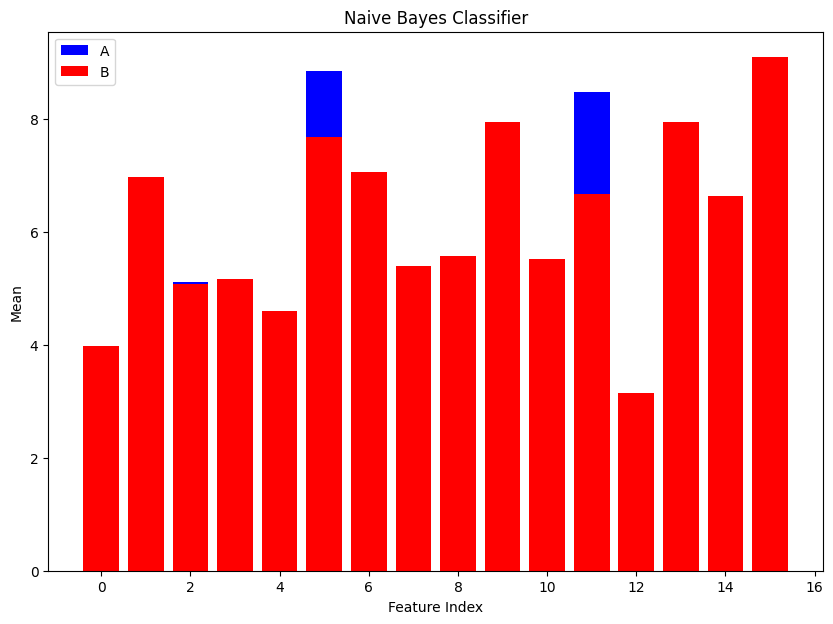

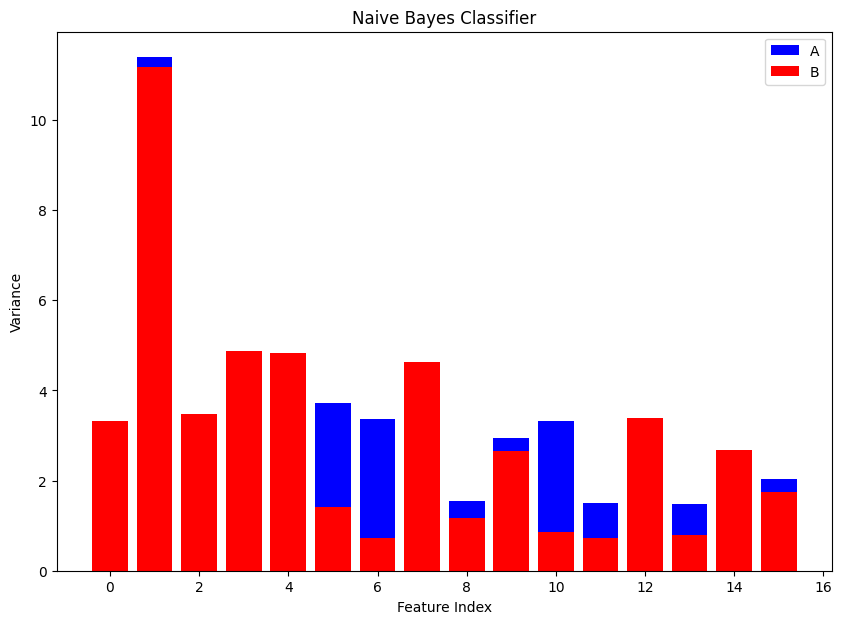

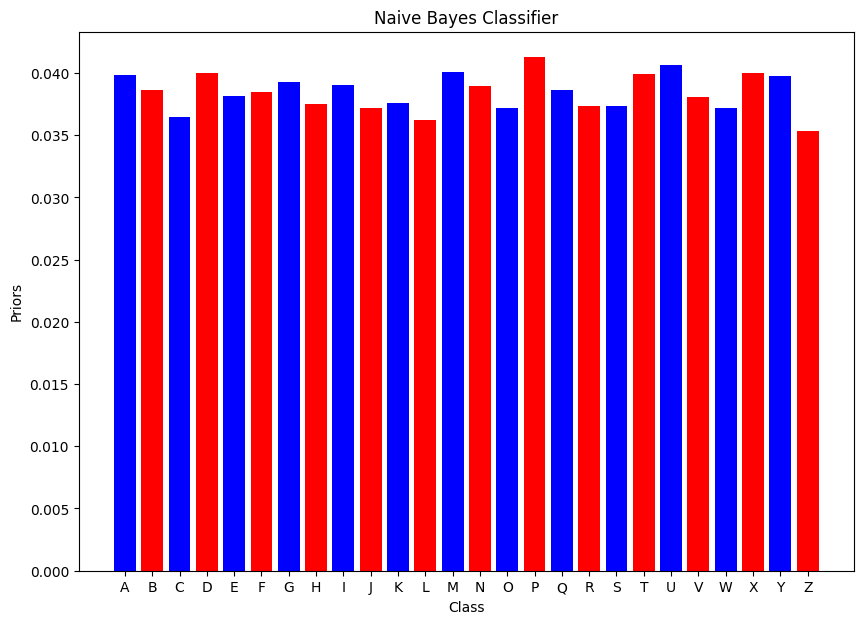

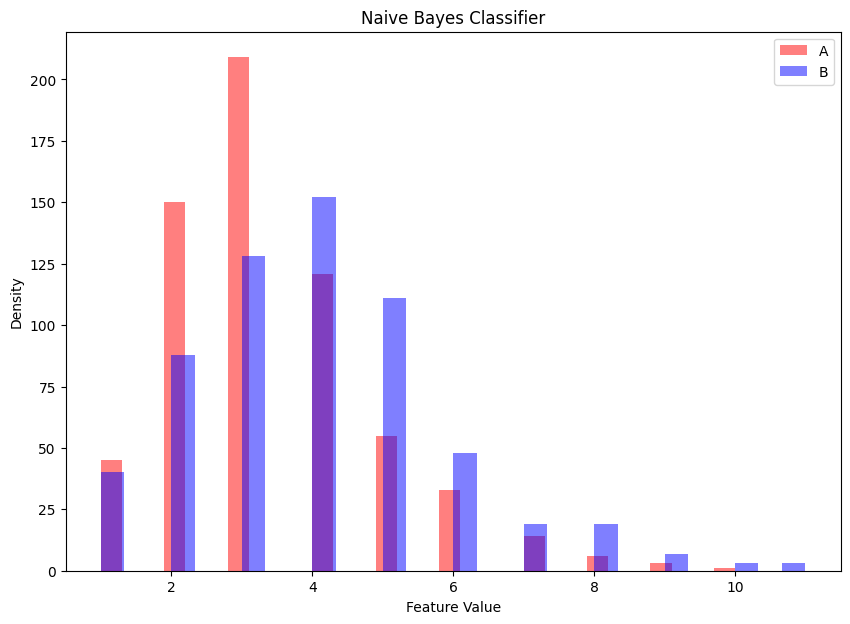

In [8]:
# Fetch the Letter Recognition dataset
letter_recognition = fetch_ucirepo(id=59)

# Data (as pandas DataFrames)
X = letter_recognition.data.features  # Features
y = letter_recognition.data.targets   # Target variable (lettr)
z = letter_recognition.data.feature_names  # Attribute names

# Combine features and target into a single DataFrame
data = pd.DataFrame(data=X, columns=z)
data['lettr'] = y  # Add the target variable to the DataFrame

# Function to split the data into training and testing sets
def split_data(data, test_size):
    data = data.sample(frac=1)  # Shuffle the data
    train_data = data.iloc[:int(len(data)*(1-test_size))]  # 80% training data
    test_data = data.iloc[int(len(data)*(1-test_size)):]   # 20% testing data
    return train_data, test_data

# Split the data into 80% training and 20% testing
train_data, test_data = split_data(data, 0.2)

# Split the features and labels for training and testing
X_train = train_data.drop(columns=['lettr']).values
y_train = train_data['lettr'].values
X_test = test_data.drop(columns=['lettr']).values
y_test = test_data['lettr'].values


class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # Initialize mean, var, and priors
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)  
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y==c] # Get the samples for the current class
            self._mean[idx, :] = X_c.mean(axis=0) # Calculate the mean for each feature
            self._var[idx, :] = X_c.var(axis=0) # Calculate the variance for each feature
            self._priors[idx] = X_c.shape[0] / float(n_samples) # Calculate the prior probability for the class
            
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self, x):
        posteriors = []

        #calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)

        #return class with highest posterior probability
        # argmax returns the index of the max value
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(- (x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator
    

# Train the Naive Bayes classifier
nb = NaiveBayes()
nb.fit(X_train, y_train)

# Predict on the test set
y_pred = nb.predict(X_test)

#mean, variance, priors and class
print("Mean:")
print(nb._mean)
print("Variance:")
print(nb._var)
print("Priors:")
print(nb._priors)
print("Classes:")
print(nb._classes)

# Evaluate accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("\n", f'Naive Bayes classifier accuracy: {accuracy * 100:.2f}%')



# Display predicted vs. actual labels for test data
print("\n", "Predicted vs Actual:")
for i in range(len(y_test)):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")

# plot the mean, varience and priors graphs
plt.figure(figsize=(10, 7))
plt.title("Naive Bayes Classifier")
plt.xlabel("Feature Index")
plt.ylabel("Mean")
plt.bar(range(len(nb._mean[0])), nb._mean[0], color='blue', label='A') #range(len(nb._mean[0])) is used to get the indices of the features. nb._mean[0] is the mean of the features for the benign class.
plt.bar(range(len(nb._mean[1])), nb._mean[1], color='red', label='B')
plt.legend()
plt.show()

plt.figure(figsize=(10, 7))
plt.title("Naive Bayes Classifier")
plt.xlabel("Feature Index")
plt.ylabel("Variance")
plt.bar(range(len(nb._var[0])), nb._var[0], color='blue', label='A')
plt.bar(range(len(nb._var[1])), nb._var[1], color='red', label='B')
plt.legend()
plt.show()

plt.figure(figsize=(10, 7))
plt.title("Naive Bayes Classifier")
plt.xlabel("Class")
plt.ylabel("Priors")
plt.bar(nb._classes, nb._priors, color=['blue', 'red'])
plt.show()

#plot using histoplot
plt.figure(figsize=(10, 7))
plt.title("Naive Bayes Classifier")
plt.xlabel("Feature Value")
plt.ylabel("Density")
plt.hist(X_train[y_train == 'A'][:, 0], bins=30, color='red', alpha=0.5, label='A')
plt.hist(X_train[y_train == 'B'][:, 0], bins=30, color='blue', alpha=0.5, label='B')
plt.legend()
plt.show()

# The density is higher for the A class than the B class.
# This is because the A class has a higher mean and lower variance compared to the B class.
# This means that the A class is more likely to have similar feature values, resulting in a higher density.
# On the other hand, the B class has a lower mean and higher variance, which results in a lower density.
# This is consistent with the Naive Bayes classifier, which predicts the class of a letter
# based on the likelihood of its features given the class. Since the A class has a higher likelihood of having similar feature values,
# it is more likely to be classified as A by the Naive Bayes classifier.

# Ecoli KNN

Nearest Neighbors, Actual Label, Predicted Label, and Distance:
Test Point 0: [0.68 0.67 0.48 0.5  0.49 0.4  0.34]
Nearest Neighbors: [[0.67 0.7  0.48 0.5  0.46 0.45 0.33]]
Actual Label: pp
Predicted Label: pp
Distance: [0.06708204]

Test Point 1: [0.54 0.49 0.48 0.5  0.4  0.87 0.88]
Nearest Neighbors: [[0.6  0.46 0.48 0.5  0.45 0.81 0.83]]
Actual Label: im
Predicted Label: im
Distance: [0.11445523]

Test Point 2: [0.12 0.43 0.48 0.5  0.63 0.7  0.74]
Nearest Neighbors: [[0.2  0.46 0.48 0.5  0.57 0.78 0.81]]
Actual Label: im
Predicted Label: im
Distance: [0.14899664]

Test Point 3: [0.63 0.71 0.48 0.5  0.6  0.4  0.39]
Nearest Neighbors: [[0.71 0.71 0.48 0.5  0.68 0.43 0.36]]
Actual Label: pp
Predicted Label: pp
Distance: [0.12083046]

Test Point 4: [0.4  0.5  0.48 0.5  0.65 0.82 0.84]
Nearest Neighbors: [[0.34 0.49 0.48 0.5  0.58 0.85 0.8 ]]
Actual Label: im
Predicted Label: im
Distance: [0.10535654]

KNN classifier accuracy: 82.35%
Predicted vs Actual:
Predicted: pp, Actual: pp
Predict

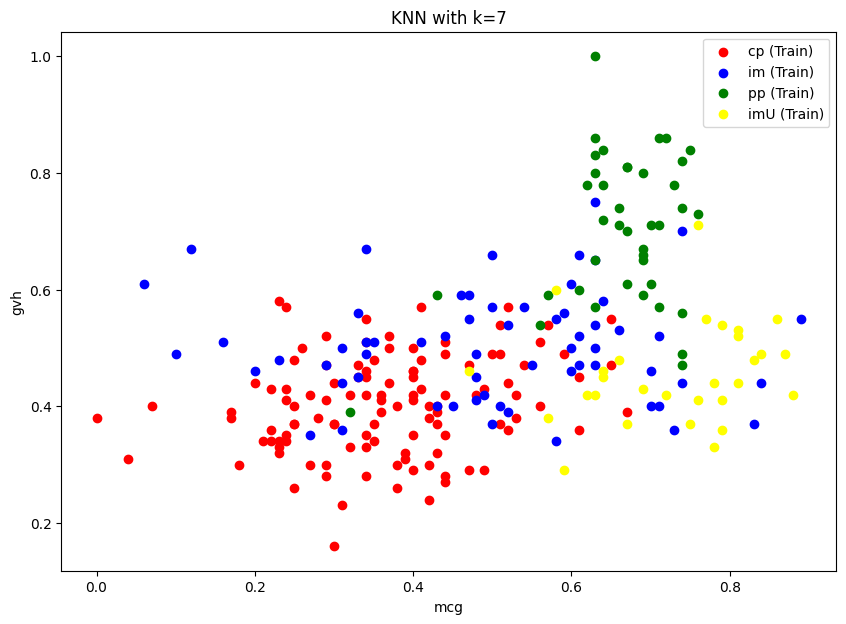

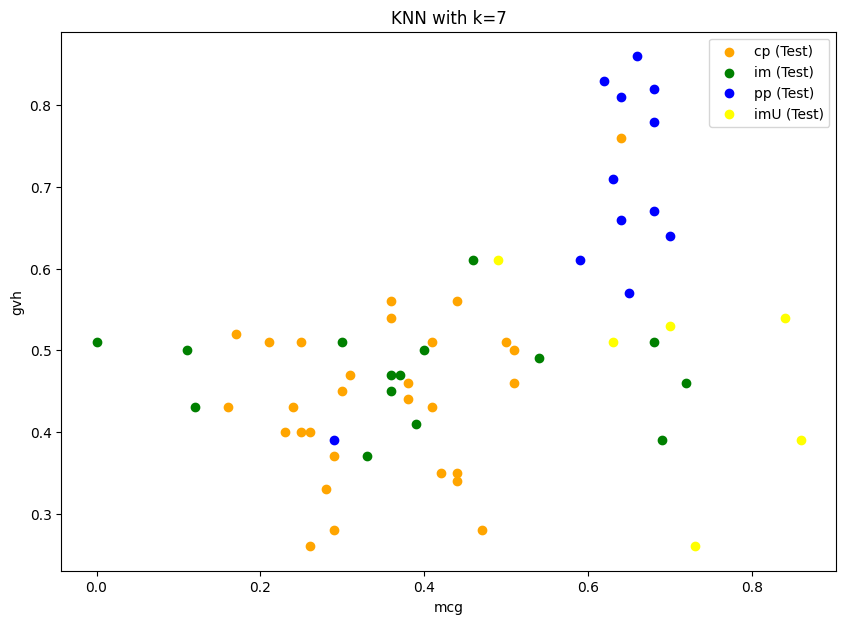

In [4]:
# Fetch the E. coli dataset
ecoli = fetch_ucirepo(id=39)

# Data (as pandas DataFrames)
X = ecoli.data.features  # Features
y = ecoli.data.targets    # Target variable (class)
z = ecoli.attributes      # Attribute names

# Combine features and target into a single DataFrame
data = pd.DataFrame(data=X, columns=z)
data['class'] = y  # Add the target variable to the DataFrame

# Function to split the dataset into training and testing sets
def split_data (data, test_size):
    data = data.sample(frac=1)
    train_data = data.iloc[:int(len(data)*(1-test_size))]
    test_data = data.iloc[int(len(data)*(1-test_size)):]
    return train_data,test_data


# Split the data into 80% training and 20% testing
train_data,test_data = split_data (data, 0.2)

# Split the features and labels for training and testing
X_train = train_data.drop(columns=['class']).values
y_train = train_data['class'].values
X_test = test_data.drop(columns=['class']).values
y_test = test_data['class'].values

alpha = 7

# Define the KNN classifier function
def knn_predict(X_train, y_train, X_test, k=alpha):
    predictions = [] # Store the predictions
    for test_point in X_test:
        # Calculate Euclidean distance from the test point to all training points
        distances = np.sqrt(np.sum((X_train - test_point)**2, axis=1))
        
        # Get indices of the k-nearest neighbors
        k_indices = distances.argsort()[:k] # Get the indices of the k-nearest neighbors using argsort(). argsort() returns the indices that would sort an array. 
        
        # Get the labels of the k-nearest neighbors
        k_nearest_labels = [y_train[i] for i in k_indices] # This is done by using the indices of the k-nearest neighbors to get the labels of the k-nearest neighbors from the training labels.
        
        # Get the most common label (majority vote)
        most_common = Counter(k_nearest_labels).most_common(1)[0][0] # Use the Counter class from the collections module to get the most common label from the k-nearest neighbors. [0][0] is used to get the most common label from the list of most common labels.
        predictions.append(most_common) # Store the prediction for the test point in the list of predictions 
    
    return predictions

# Run KNN with k=3 (or choose a suitable k value)
k = alpha
y_pred = knn_predict(X_train, y_train, X_test, k)

# show the nearets neighbors, their actual label, the predicted lable, and their distance. Do it for 5 points
print("Nearest Neighbors, Actual Label, Predicted Label, and Distance:")
for i in range(5): # Loop through the first 5 test point
    print(f"Test Point {i}: {X_test[i]}")
    distances = np.sqrt(np.sum((X_train - X_test[i])**2, axis=1))
    k_indices = distances.argsort()[:1]
    print(f"Nearest Neighbors: {X_train[k_indices]}")
    print(f"Actual Label: {y_test[i]}")
    print(f"Predicted Label: {y_pred[i]}")
    print(f"Distance: {distances[k_indices]}")
    print()

# Evaluate accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test) 
print(f'KNN classifier accuracy: {accuracy * 100:.2f}%')

# Display predicted vs. actual labels for test data
print("Predicted vs Actual:")
for i in range(len(y_test)):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")

# Be able to randomly chose features to plot
feature_indices = [0, 1]  # Use the actual column indices you chose for your features
X_train = train_data.iloc[:, feature_indices].values # update the X_train with the features_indices selected
X_test = test_data.iloc[:, feature_indices].values # update the X_test with the features_indices selected

# Get the names of the selected features
feature_1_name = data.columns[feature_indices[0]]
feature_2_name = data.columns[feature_indices[1]]

print("Chosen Features for Plotting:")
print(f"Feature 1: {feature_1_name}")
print(f"Feature 2: {feature_2_name}")

# plot the train data
plt.figure(figsize=(10, 7))
plt.title(f"KNN with k={k}")

# Set the labels for the x and y axes
plt.xlabel(feature_1_name)
plt.ylabel(feature_2_name)

plt.scatter(X_train[y_train == 'cp', 0], X_train[y_train == 'cp', 1], color='red', label='cp (Train)') # select the first row of X_train where y_train is 'M' and plot it against the second row of X_train where y_train is 'M'
plt.scatter(X_train[y_train == 'im', 0], X_train[y_train == 'im', 1], color='blue', label='im (Train)') # select the first row of X_train where y_train is 'B' and plot it against the second row of X_train where y_train is 'B'
plt.scatter(X_train[y_train == 'pp', 0], X_train[y_train == 'pp', 1], color='green', label='pp (Train)') # select the first row of X_train where y_train is 'B' and plot it against the second row of X_train where y_train is 'B'
plt.scatter(X_train[y_train == 'imU', 0], X_train[y_train == 'imU', 1], color='yellow', label='imU (Train)') # select the first row of X_train where y_train is 'B' and plot it against the second row of X_train where y_train is 'B'

plt.legend()
plt.show()

# plot the test data
plt.figure(figsize=(10, 7))
plt.title(f"KNN with k={k}")

# Set the labels for the x and y axes
plt.xlabel(feature_1_name)
plt.ylabel(feature_2_name)

plt.scatter(X_test[y_test == 'cp', 0], X_test[y_test == 'cp', 1], color='orange', label='cp (Test)') # select the first row of X_test where y_test is 'M' and plot it against the second row of X_test where y_test is 'M'
plt.scatter(X_test[y_test == 'im', 0], X_test[y_test == 'im', 1], color='green', label='im (Test)') # select the first row of X_test where y_test is 'B' and plot it against the second row of X_test where y_test is 'B'
plt.scatter(X_test[y_test == 'pp', 0], X_test[y_test == 'pp', 1], color='blue', label='pp (Test)') # select the first row of X_test where y_test is 'B' and plot it against the second row of X_test where y_test is 'B'
plt.scatter(X_test[y_test == 'imU', 0], X_test[y_test == 'imU', 1], color='yellow', label='imU (Test)') # select the first row of X_test where y_test is 'B' and plot it against the second row of X_test where y_test is 'B'

plt.legend()
plt.show()




# Ecoli Bayesian Classifier


Mean:
[[0.36385965 0.41140351 0.48       0.5        0.46131579 0.31526316
  0.40017544]
 [0.4696875  0.4990625  0.488125   0.5        0.53703125 0.759375
  0.7378125 ]
 [0.75       0.55       1.         1.         0.4        0.47
  0.3       ]
 [0.85       0.53       0.48       0.5        0.53       0.52
  0.35      ]
 [0.71846154 0.45346154 0.5        0.5        0.55346154 0.73230769
  0.74346154]
 [0.67642857 0.71785714 0.48       0.5        0.73642857 0.46714286
  0.29428571]
 [0.698      0.512      1.         0.5        0.542      0.564
  0.222     ]
 [0.66       0.70604651 0.48       0.5        0.44023256 0.4672093
  0.36790698]]
Variance:
[[1.49587873e-02 7.84539858e-03 1.11241714e-30 0.00000000e+00
  6.80090028e-03 1.05758079e-02 8.59821484e-03]
 [3.70155273e-02 8.08349609e-03 4.15898438e-03 0.00000000e+00
  1.35614990e-02 1.07558594e-02 2.40202148e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 

C:\Users\yman7\AppData\Local\Temp\ipykernel_940\2554433452.py:69: RuntimeWarning: invalid value encountered in divide
  numerator = np.exp(- (x - mean) ** 2 / (2 * var))
C:\Users\yman7\AppData\Local\Temp\ipykernel_940\2554433452.py:69: RuntimeWarning: divide by zero encountered in divide
  numerator = np.exp(- (x - mean) ** 2 / (2 * var))
C:\Users\yman7\AppData\Local\Temp\ipykernel_940\2554433452.py:71: RuntimeWarning: invalid value encountered in divide
  return numerator / denominator
C:\Users\yman7\AppData\Local\Temp\ipykernel_940\2554433452.py:58: RuntimeWarning: divide by zero encountered in log
  posterior = np.sum(np.log(self._pdf(idx, x)))


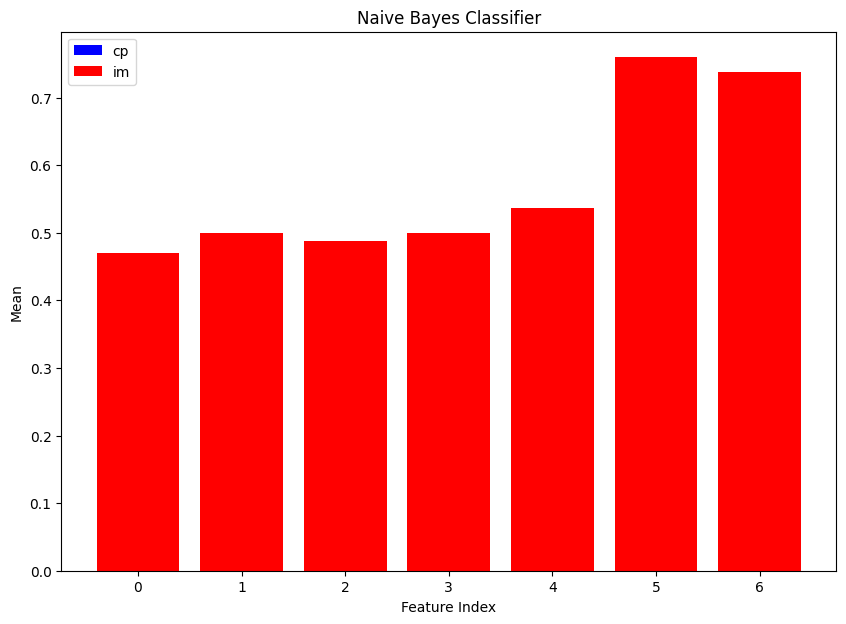

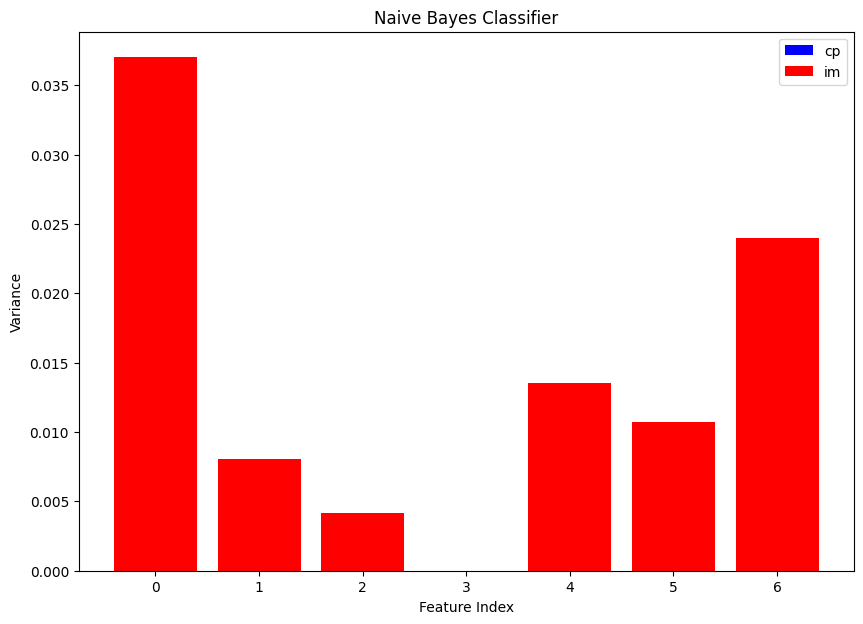

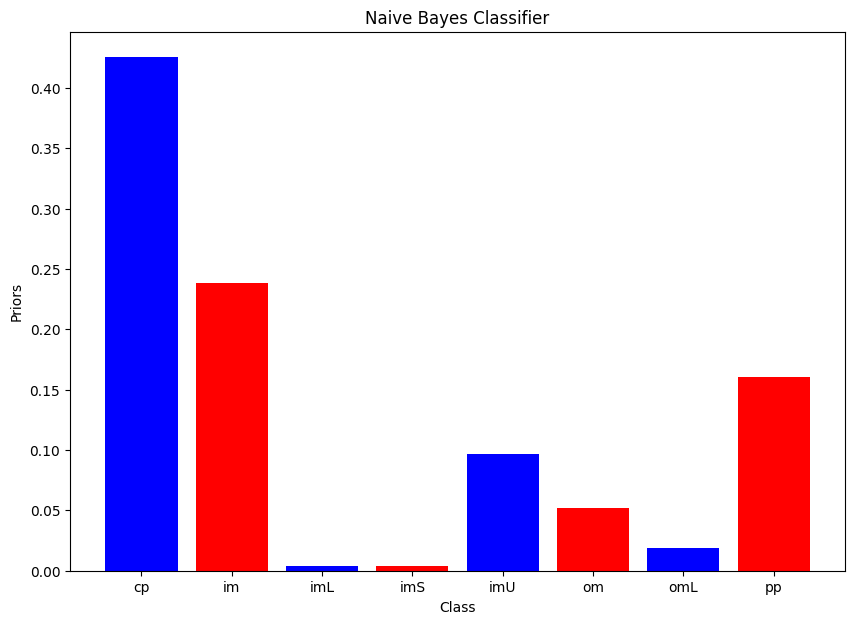

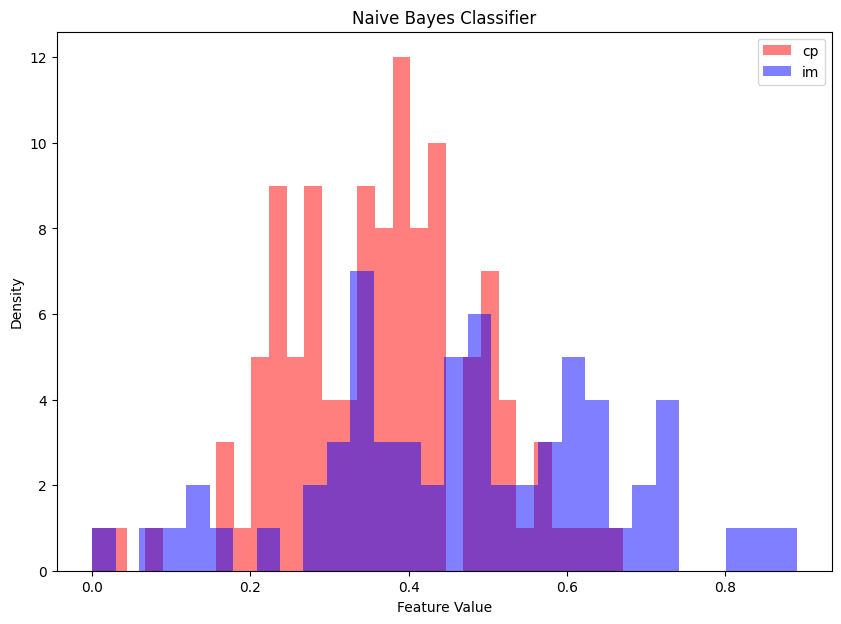

In [14]:
# Fetch the E. coli dataset
ecoli = fetch_ucirepo(id=39)

# Data (as pandas DataFrames)
X = ecoli.data.features  # Features
y = ecoli.data.targets    # Target variable (class)
z = ecoli.attributes      # Attribute names

# Combine features and target into a single DataFrame
data = pd.DataFrame(data=X, columns=z)
data['class'] = y  # Add the target variable to the DataFrame

# Function to split the dataset into training and testing sets
def split_data (data, test_size):
    data = data.sample(frac=1)
    train_data = data.iloc[:int(len(data)*(1-test_size))]
    test_data = data.iloc[int(len(data)*(1-test_size)):]
    return train_data,test_data


# Split the data into 80% training and 20% testing
train_data,test_data = split_data (data, 0.2)

# Split the features and labels for training and testing
X_train = train_data.drop(columns=['class']).values
y_train = train_data['class'].values
X_test = test_data.drop(columns=['class']).values
y_test = test_data['class'].values


class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # Initialize mean, var, and priors
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)  
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y==c] # Get the samples for the current class
            self._mean[idx, :] = X_c.mean(axis=0) # Calculate the mean for each feature
            self._var[idx, :] = X_c.var(axis=0) # Calculate the variance for each feature
            self._priors[idx] = X_c.shape[0] / float(n_samples) # Calculate the prior probability for the class
            
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self, x):
        posteriors = []

        #calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)

        #return class with highest posterior probability
        # argmax returns the index of the max value
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(- (x - mean) ** 2 / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator
    

# Train the Naive Bayes classifier
nb = NaiveBayes()
nb.fit(X_train, y_train)

# Predict on the test set
y_pred = nb.predict(X_test)

#mean, variance, priors and class
print("Mean:")
print(nb._mean)
print("Variance:")
print(nb._var)
print("Priors:")
print(nb._priors)
print("Classes:")
print(nb._classes)

# Evaluate accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("\n", f'Naive Bayes classifier accuracy: {accuracy * 100:.2f}%')

# Display predicted vs. actual labels for test data
print("\n", "Predicted vs Actual:")
for i in range(len(y_test)):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")


# plot the mean, varience and priors graphs
plt.figure(figsize=(10, 7))
plt.title("Naive Bayes Classifier")
plt.xlabel("Feature Index")
plt.ylabel("Mean")
plt.bar(range(len(nb._mean[0])), nb._mean[0], color='blue', label='cp') #range(len(nb._mean[0])) is used to get the indices of the features. nb._mean[0] is the mean of the features for the benign class.
plt.bar(range(len(nb._mean[1])), nb._mean[1], color='red', label='im')
plt.legend()
plt.show()

plt.figure(figsize=(10, 7))
plt.title("Naive Bayes Classifier")
plt.xlabel("Feature Index")
plt.ylabel("Variance")
plt.bar(range(len(nb._var[0])), nb._var[0], color='blue', label='cp')
plt.bar(range(len(nb._var[1])), nb._var[1], color='red', label='im')
plt.legend()
plt.show()

plt.figure(figsize=(10, 7))
plt.title("Naive Bayes Classifier")
plt.xlabel("Class")
plt.ylabel("Priors")
plt.bar(nb._classes, nb._priors, color=['blue', 'red'])
plt.show()

#plot using histoplot
plt.figure(figsize=(10, 7))
plt.title("Naive Bayes Classifier")
plt.xlabel("Feature Value")
plt.ylabel("Density")
plt.hist(X_train[y_train == 'cp'][:, 0], bins=30, color='red', alpha=0.5, label='cp')
plt.hist(X_train[y_train == 'im'][:, 0], bins=30, color='blue', alpha=0.5, label='im')
plt.legend()
plt.show()

# The density is higher for the cp class than the im class.
# This is because the cp class has a higher mean and lower variance compared to the im class.
# This means that the cp class is more likely to have similar feature values, resulting in a higher density.
# On the other hand, the im class has a lower mean and higher variance, which results in a lower density.
# This is consistent with the Naive Bayes classifier, which predicts the class of a letter
# based on the likelihood of its features given the class. Since the cp class has a higher likelihood of having similar feature values,
# it is more likely to be classified as cp by the Naive Bayes classifier.




# Robot Failure KNN

Nearest Neighbors, Actual Label, Predicted Label, and Distance:
Test Point 0: [ -1.   3.  63. -11.  -3.  -1.]
Nearest Neighbors: [[ -1.   1.  63. -11.  -3.  -1.]]
Actual Label: collision
Predicted Label: normal
Distance: [2.]

Test Point 1: [   88.     4. -1120.   283.   -89.    47.]
Nearest Neighbors: [[   88.     4. -1120.   283.   -89.    47.]]
Actual Label: bottom_obstruction
Predicted Label: obstruction
Distance: [0.]

Test Point 2: [ 1. -1. 53. -4. -4. -2.]
Nearest Neighbors: [[-1.  0. 54. -4. -3.  0.]]
Actual Label: collision
Predicted Label: normal
Distance: [3.31662479]

Test Point 3: [ 3. -1. -7.  7.  6.  5.]
Nearest Neighbors: [[ 3. -1. -7.  7.  6.  5.]]
Actual Label: bottom_collision
Predicted Label: bottom_collision
Distance: [0.]

Test Point 4: [  11.  -50. -606. -445.  -70.    3.]
Nearest Neighbors: [[  11.  -50. -606. -445.  -70.    3.]]
Actual Label: obstruction
Predicted Label: obstruction
Distance: [0.]

KNN classifier accuracy: 43.41%
Predicted vs Actual:
Predicted:

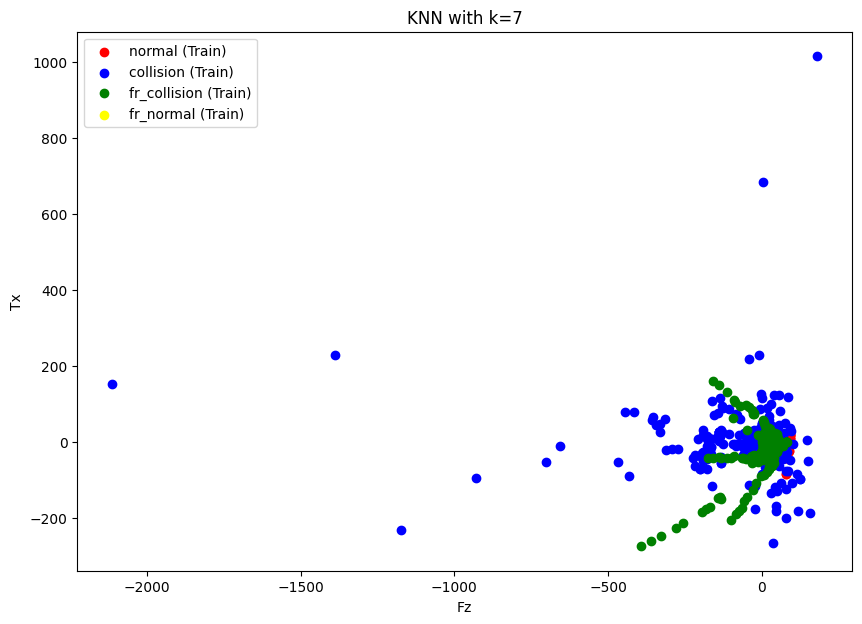

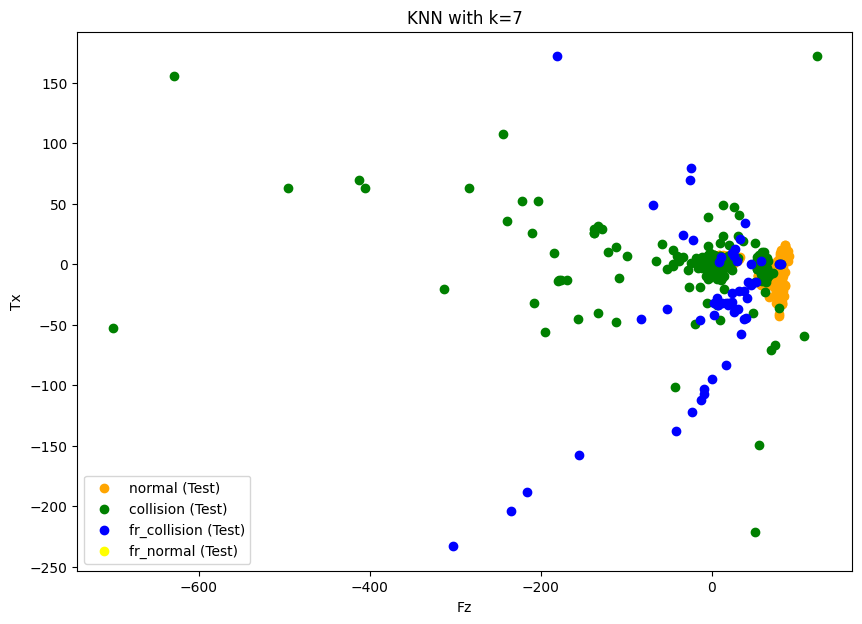

In [15]:
# Read and concatenate the robotic failure datasets
data = pd.concat([pd.read_csv('LP1.csv'), pd.read_csv('LP2.csv'), pd.read_csv('LP3.csv'), pd.read_csv('LP4.csv'), pd.read_csv('LP5.csv')], ignore_index=True)

# Drop the 'ok' column if it exists
if 'ok' in data.columns:
    data = data.drop(columns=['ok'])

# Forward-fill missing values in the 'Target' column and fill remaining NaNs with 'normal'
data['normal'] = data['normal'].ffill().fillna('normal')

# Rename 'normal' to 'Target' and the first six columns as requested
data.columns = ['Target', 'Fx', 'Fy', 'Fz', 'Tx', 'Ty', 'Tz'] + list(data.columns[7:])

# Remove rows with any missing values in Fx, Fy, Fz, Tx, Ty, or Tz columns
data.dropna(subset=['Fx', 'Fy', 'Fz', 'Tx', 'Ty', 'Tz'], inplace=True)

# Move the 'Target' column to the last position
columns = [col for col in data.columns if col != 'Target'] + ['Target']
data = data[columns]

# Save the cleaned dataset to a new CSV file
data.to_csv('LP_Sorted_Dataset.csv', index=False)

# 3) Create a function to split the dataset into training and testing sets
def split_data(data, test_size):
    data = data.sample(frac=1)  # Shuffle the data
    train_data = data.iloc[:int(len(data)*(1-test_size))]
    test_data = data.iloc[int(len(data)*(1-test_size)):]
    return train_data, test_data

# Split the data into 80% training and 20% testing
train_data, test_data = split_data(data, 0.2)

# Split the features and labels for training and testing
X_train = train_data.drop(columns=['Target']).values
y_train = train_data['Target'].values
X_test = test_data.drop(columns=['Target']).values
y_test = test_data['Target'].values


alpha = 7

# Define the KNN classifier function
def knn_predict(X_train, y_train, X_test, k=alpha):
    predictions = [] # Store the predictions
    for test_point in X_test:
        # Calculate Euclidean distance from the test point to all training points
        distances = np.sqrt(np.sum((X_train - test_point)**2, axis=1))
        
        # Get indices of the k-nearest neighbors
        k_indices = distances.argsort()[:k] # Get the indices of the k-nearest neighbors using argsort(). argsort() returns the indices that would sort an array. 
        
        # Get the labels of the k-nearest neighbors
        k_nearest_labels = [y_train[i] for i in k_indices] # This is done by using the indices of the k-nearest neighbors to get the labels of the k-nearest neighbors from the training labels.
        
        # Get the most common label (majority vote)
        most_common = Counter(k_nearest_labels).most_common(1)[0][0] # Use the Counter class from the collections module to get the most common label from the k-nearest neighbors. [0][0] is used to get the most common label from the list of most common labels.
        predictions.append(most_common) # Store the prediction for the test point in the list of predictions 
    
    return predictions

# Run KNN with k=3 (or choose a suitable k value)
k = alpha
y_pred = knn_predict(X_train, y_train, X_test, k)

# show the nearets neighbors, their actual label, the predicted lable, and their distance. Do it for 5 points
print("Nearest Neighbors, Actual Label, Predicted Label, and Distance:")
for i in range(5): # Loop through the first 5 test point
    print(f"Test Point {i}: {X_test[i]}")
    distances = np.sqrt(np.sum((X_train - X_test[i])**2, axis=1))
    k_indices = distances.argsort()[:1]
    print(f"Nearest Neighbors: {X_train[k_indices]}")
    print(f"Actual Label: {y_test[i]}")
    print(f"Predicted Label: {y_pred[i]}")
    print(f"Distance: {distances[k_indices]}")
    print()

# Evaluate accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test) 
print(f'KNN classifier accuracy: {accuracy * 100:.2f}%')

# Display predicted vs. actual labels for test data
print("Predicted vs Actual:")
for i in range(len(y_test)):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")

# Be able to randomly chose features to plot
feature_indices = [2, 3]  # Use the actual column indices you chose for your features
X_train = train_data.iloc[:, feature_indices].values # update the X_train with the features_indices selected
X_test = test_data.iloc[:, feature_indices].values # update the X_test with the features_indices selected

# Get the names of the selected features
feature_1_name = data.columns[feature_indices[0]]
feature_2_name = data.columns[feature_indices[1]]

print("Chosen Features for Plotting:")
print(f"Feature 1: {feature_1_name}")
print(f"Feature 2: {feature_2_name}")

# plot the train data
plt.figure(figsize=(10, 7))
plt.title(f"KNN with k={k}")

# Set the labels for the x and y axes
plt.xlabel(feature_1_name)
plt.ylabel(feature_2_name)

plt.scatter(X_train[y_train == 'normal', 0], X_train[y_train == 'normal', 1], color='red', label='normal (Train)') # select the first row of X_train where y_train is 'M' and plot it against the second row of X_train where y_train is 'M'
plt.scatter(X_train[y_train == 'collision', 0], X_train[y_train == 'collision', 1], color='blue', label='collision (Train)') # select the first row of X_train where y_train is 'B' and plot it against the second row of X_train where y_train is 'B'
plt.scatter(X_train[y_train == 'fr_collision', 0], X_train[y_train == 'fr_collision', 1], color='green', label='fr_collision (Train)') # select the first row of X_train where y_train is 'B' and plot it against the second row of X_train where y_train is 'B'
plt.scatter(X_train[y_train == 'fr_normal', 0], X_train[y_train == 'fr_normal', 1], color='yellow', label='fr_normal (Train)') # select the first row of X_train where y_train is 'B' and plot it against the second row of X_train where y_train is 'B'

plt.legend()
plt.show()

# plot the test data
plt.figure(figsize=(10, 7))
plt.title(f"KNN with k={k}")

# Set the labels for the x and y axes
plt.xlabel(feature_1_name)
plt.ylabel(feature_2_name)

plt.scatter(X_test[y_test == 'normal', 0], X_test[y_test == 'normal', 1], color='orange', label='normal (Test)') # select the first row of X_test where y_test is 'M' and plot it against the second row of X_test where y_test is 'M'
plt.scatter(X_test[y_test == 'collision', 0], X_test[y_test == 'collision', 1], color='green', label='collision (Test)') # select the first row of X_test where y_test is 'B' and plot it against the second row of X_test where y_test is 'B'
plt.scatter(X_test[y_test == 'fr_collision', 0], X_test[y_test == 'fr_collision', 1], color='blue', label='fr_collision (Test)') # select the first row of X_test where y_test is 'B' and plot it against the second row of X_test where y_test is 'B'
plt.scatter(X_test[y_test == 'fr_normal', 0], X_test[y_test == 'fr_normal', 1], color='yellow', label='fr_normal (Test)') # select the first row of X_test where y_test is 'B' and plot it against the second row of X_test where y_test is 'B'

plt.legend()
plt.show()




# Robot Failure Bayesian Classifier

Mean:
[[ 2.17261905e-01 -2.05505952e+00  7.99880952e+01 -7.66815476e+00
  -9.48660714e+00 -6.33333333e+00]
 [ 3.89836066e+00 -6.60983607e+00 -8.15245902e+01  5.15081967e+00
   2.86229508e+00  1.00327869e+00]
 [ 5.10843373e+00 -3.58072289e+01 -8.06301205e+02  2.60361446e+01
  -1.35301205e+01 -3.24096386e+00]
 [-3.30848089e-01 -8.88164026e-01 -4.31500466e+00 -9.34762349e-01
   9.84156570e-01 -1.36905871e+00]
 [-1.61996497e+00  4.93870403e-01  2.95113835e+01 -3.24518389e+00
  -2.87740806e+00 -4.80385289e+00]
 [-5.03164557e-01 -8.86075949e-01  4.54968354e+01 -4.40506329e+00
  -2.32594937e+00 -4.83860759e+00]
 [-1.81159420e+00  7.06763285e+00 -1.33816425e+00 -2.46956522e+01
  -7.58937198e+00  1.78743961e-01]
 [-2.19178082e+00  6.84931507e-01  8.60547945e+01 -1.25068493e+01
  -3.47945205e+00 -9.13698630e+00]
 [-3.46846847e+00  1.81981982e+00  8.26306306e+01 -1.97477477e+01
  -1.72612613e+01 -7.69369369e+00]
 [-1.84152139e+00 -4.79397781e-01  4.68827258e+01 -3.04912837e+00
  -8.69413629e+00 -

C:\Users\yman7\AppData\Local\Temp\ipykernel_940\125262152.py:67: RuntimeWarning: divide by zero encountered in log
  posterior = np.sum(np.log(self._pdf(idx, x)))


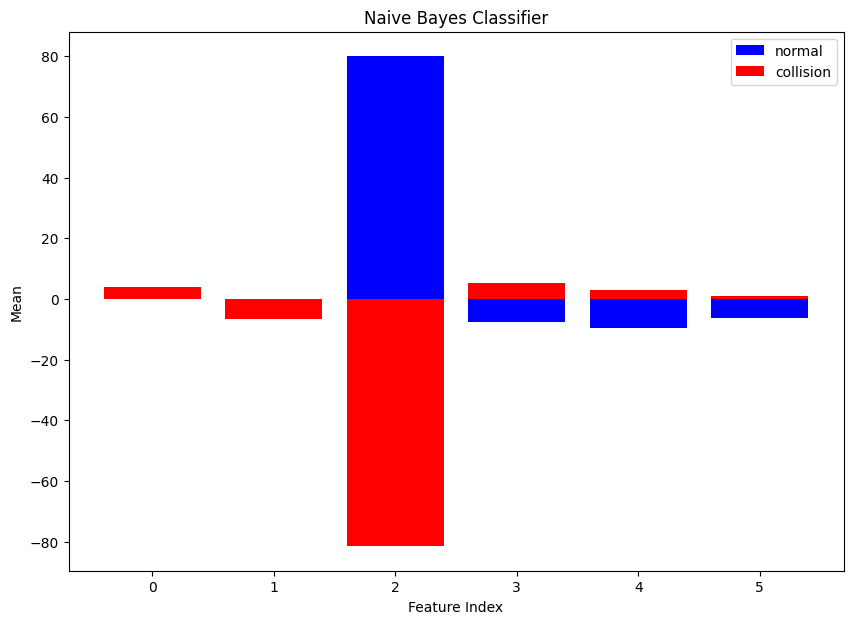

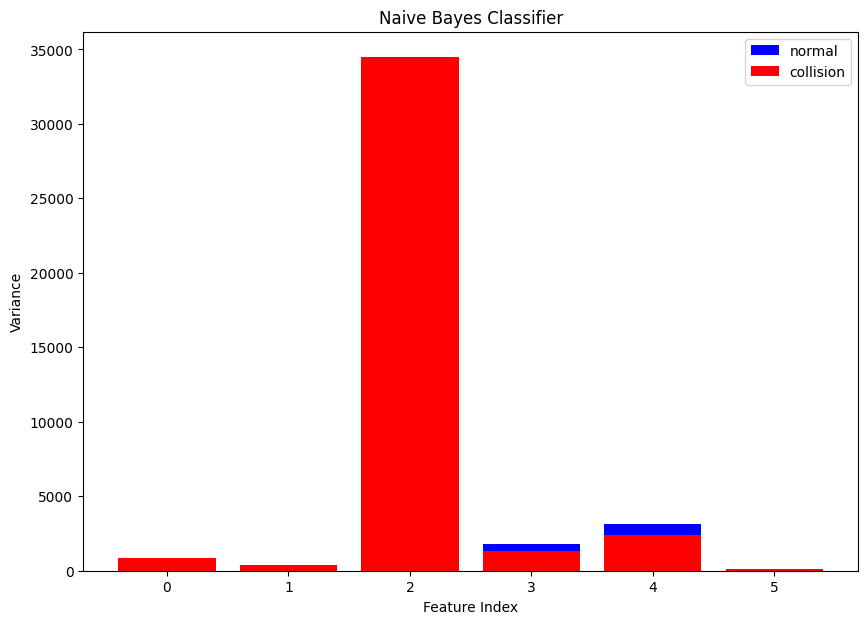

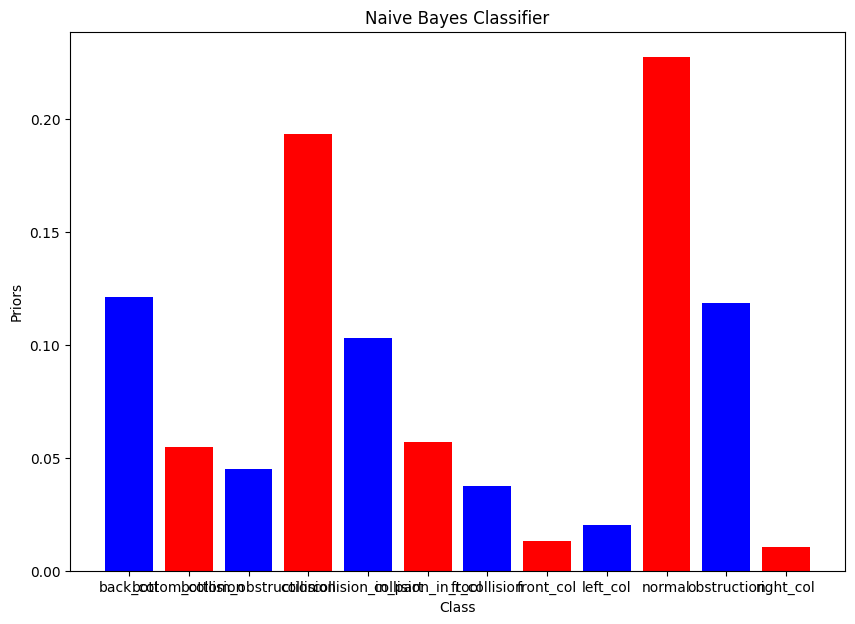

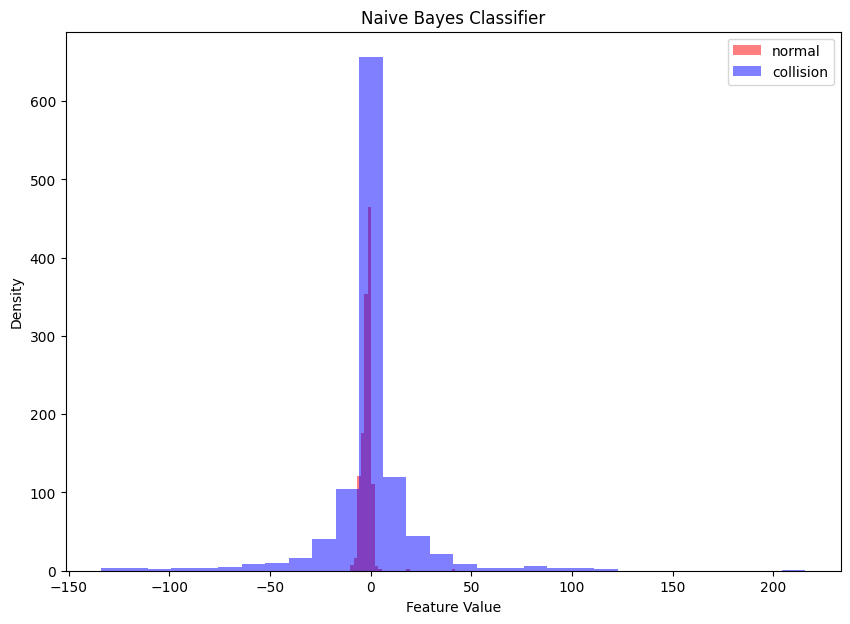

In [16]:
# Read and concatenate the robotic failure datasets
data = pd.concat([pd.read_csv('LP1.csv'), pd.read_csv('LP2.csv'), pd.read_csv('LP3.csv'), pd.read_csv('LP4.csv'), pd.read_csv('LP5.csv')], ignore_index=True)

# Drop the 'ok' column if it exists
if 'ok' in data.columns:
    data = data.drop(columns=['ok'])

# Forward-fill missing values in the 'Target' column and fill remaining NaNs with 'normal'
data['normal'] = data['normal'].ffill().fillna('normal')

# Rename 'normal' to 'Target' and the first six columns as requested
data.columns = ['Target', 'Fx', 'Fy', 'Fz', 'Tx', 'Ty', 'Tz'] + list(data.columns[7:])

# Remove rows with any missing values in Fx, Fy, Fz, Tx, Ty, or Tz columns
data.dropna(subset=['Fx', 'Fy', 'Fz', 'Tx', 'Ty', 'Tz'], inplace=True)

# Move the 'Target' column to the last position
columns = [col for col in data.columns if col != 'Target'] + ['Target']
data = data[columns]

# Save the cleaned dataset to a new CSV file
data.to_csv('LP_Sorted_Dataset.csv', index=False)

# 3) Create a function to split the dataset into training and testing sets
def split_data(data, test_size):
    data = data.sample(frac=1)  # Shuffle the data
    train_data = data.iloc[:int(len(data)*(1-test_size))]
    test_data = data.iloc[int(len(data)*(1-test_size)):]
    return train_data, test_data

# Split the data into 80% training and 20% testing
train_data, test_data = split_data(data, 0.2)

# Split the features and labels for training and testing
X_train = train_data.drop(columns=['Target']).values
y_train = train_data['Target'].values
X_test = test_data.drop(columns=['Target']).values
y_test = test_data['Target'].values

class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # Initialize mean, var, and priors
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)  
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y==c] # Get the samples for the current class
            self._mean[idx, :] = X_c.mean(axis=0) # Calculate the mean for each feature
            self._var[idx, :] = X_c.var(axis=0) # Calculate the variance for each feature
            self._priors[idx] = X_c.shape[0] / float(n_samples) # Calculate the prior probability for the class
            
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    
    def _predict(self, x):
        posteriors = []

        #calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)

        #return class with highest posterior probability
        # argmax returns the index of the max value
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x): # The probability density function (pdf) for a Gaussian distribution
        mean = self._mean[class_idx] # The mean of the Gaussian distribution for the class
        var = self._var[class_idx] # The variance of the Gaussian distribution for the class
        numerator = np.exp(- (x - mean) ** 2 / (2 * var)) # The numerator of the Gaussian distribution
        denominator = np.sqrt(2 * np.pi * var) # The denominator of the Gaussian distribution
        return numerator / denominator # The pdf of the Gaussian distribution
    

# Train the Naive Bayes classifier
nb = NaiveBayes()
nb.fit(X_train, y_train)

# Predict on the test set
y_pred = nb.predict(X_test)

#mean, variance, priors and class
print("Mean:")
print(nb._mean)
print("Variance:")
print(nb._var)
print("Priors:")
print(nb._priors)
print("Classes:")
print(nb._classes)

# Evaluate accuracy
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("\n", f'Naive Bayes classifier accuracy: {accuracy * 100:.2f}%')



# Display predicted vs. actual labels for test data
print("\n", "Predicted vs Actual:")
for i in range(len(y_test)):
    print(f"Predicted: {y_pred[i]}, Actual: {y_test[i]}")

# plot the mean, varience and priors graphs
plt.figure(figsize=(10, 7))
plt.title("Naive Bayes Classifier")
plt.xlabel("Feature Index")
plt.ylabel("Mean")
plt.bar(range(len(nb._mean[0])), nb._mean[0], color='blue', label='normal') #range(len(nb._mean[0])) is used to get the indices of the features. nb._mean[0] is the mean of the features for the benign class.
plt.bar(range(len(nb._mean[1])), nb._mean[1], color='red', label='collision')
plt.legend()
plt.show()

plt.figure(figsize=(10, 7))
plt.title("Naive Bayes Classifier")
plt.xlabel("Feature Index")
plt.ylabel("Variance")
plt.bar(range(len(nb._var[0])), nb._var[0], color='blue', label='normal')
plt.bar(range(len(nb._var[1])), nb._var[1], color='red', label='collision')
plt.legend()
plt.show()

plt.figure(figsize=(10, 7))
plt.title("Naive Bayes Classifier")
plt.xlabel("Class")
plt.ylabel("Priors")
plt.bar(nb._classes, nb._priors, color=['blue', 'red'])
plt.show()

#plot using histoplot
plt.figure(figsize=(10, 7))
plt.title("Naive Bayes Classifier")
plt.xlabel("Feature Value")
plt.ylabel("Density")
plt.hist(X_train[y_train == 'normal'][:, 0], bins=30, color='red', alpha=0.5, label='normal')
plt.hist(X_train[y_train == 'collision'][:, 0], bins=30, color='blue', alpha=0.5, label='collision')
plt.legend()
plt.show()

# The density is higher for the normal class than the collision class.
# This is because the normal class has a higher mean and lower variance compared to the collision class.
# This means that the normal class is more likely to have similar feature values, resulting in a higher density.
# On the other hand, the collision class has a lower mean and higher variance, which results in a lower density.
# This is consistent with the Naive Bayes classifier, which predicts the class of a letter
# based on the likelihood of its features given the class. Since the normal class has a higher likelihood of having similar feature values,
# it is more likely to be classified as normal by the Naive Bayes classifier.


